# Supervised Learning - Foundations: ReCell 

***Marks: 60***

## Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
## Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
## Data Description
The data contains the different attributes of used/refurbished phones and tablets. The detailed data dictionary is given below.

**Data Dictionary**

- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- new_price: Price of a new device of the same model in euros
- used_price: Price of the used/refurbished device in euros

# 1- Importing necessary libraries and data

In [1]:
# This will help in making the Python code more structured automatically
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

<IPython.core.display.Javascript object>

In [2]:
# Removes the limit from the number of displayed columns and rows.

# This is so I can see the entire dataframe when I print it
pd.set_option("display.max_columns", None)

# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

<IPython.core.display.Javascript object>

# 2- Loading and exploring the data

In [3]:
# loading the dataset
data = pd.read_csv("used_device_data.csv")

print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")  # f-string

# I'm now going to look at 20 random rows
# I'm setting the random seed via np.random.seed so that I get the same random results every time

np.random.seed(5)
data.sample(n=20)

There are 3454 rows and 15 columns.


,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
1825,Meizu,Android,12.88,yes,no,21.0,5.0,32.0,4.0,3050.0,168.0,2015,752,388.89,127.30
698,Asus,Android,15.90,yes,no,NaN,8.0,64.0,4.0,4000.0,165.0,2019,397,310.53,86.73
2997,Xiaomi,Android,12.83,no,no,13.0,5.0,32.0,4.0,3100.0,199.0,2014,1017,121.05,73.04
667,Apple,iOS,10.34,yes,no,8.0,1.2,16.0,4.0,1810.0,129.0,2014,877,361.50,50.94
697,Asus,Android,15.90,yes,no,NaN,8.0,32.0,4.0,4000.0,165.0,2019,524,299.27,113.06
819,BlackBerry,Android,15.21,yes,no,NaN,16.0,64.0,4.0,4000.0,170.0,2018,629,348.29,109.28
3365,Motorola,Android,15.34,yes,no,NaN,8.0,32.0,3.0,4000.0,189.4,2020,101,169.99,97.42
1896,Micromax,Android,10.34,no,no,5.0,2.0,16.0,4.0,2000.0,158.0,2014,797,90.06,47.22
3381,Motorola,Android,15.34,yes,no,48.0,25.0,128.0,4.0,3600.0,165.0,2019,422,254.99,206.65
1757,LG,Android,12.57,yes,no,8.0,1.3,16.0,4.0,2300.0,130.0,2013,633,261.47,69.54


<IPython.core.display.Javascript object>

## Observation: 
* Looking at these 20 random rows, it is obvious that that the column 'main_camera_mp' contains potentially have a lot of missing values so we'll want to make sure to look into that later

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3454 non-null   object 
 1   os                3454 non-null   object 
 2   screen_size       3454 non-null   float64
 3   4g                3454 non-null   object 
 4   5g                3454 non-null   object 
 5   main_camera_mp    3275 non-null   float64
 6   selfie_camera_mp  3452 non-null   float64
 7   int_memory        3450 non-null   float64
 8   ram               3450 non-null   float64
 9   battery           3448 non-null   float64
 10  weight            3447 non-null   float64
 11  release_year      3454 non-null   int64  
 12  days_used         3454 non-null   int64  
 13  new_price         3454 non-null   float64
 14  used_price        3454 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 404.9+ KB


<IPython.core.display.Javascript object>

## Observation: 
* 4 out of 15 columns are object type variables
* The rest (11 columns) contains integer and float type data which are numeric.
* There are some null values in the columns

# 3- Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. Budget devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of budget devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the price of a used device?

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.08,12.7000,12.830,15.340,30.71
main_camera_mp,3275.0,9.460208,4.815461,0.08,5.0000,8.000,13.000,48.00
selfie_camera_mp,3452.0,6.554229,6.970372,0.00,2.0000,5.000,8.000,32.00
int_memory,3450.0,54.573099,84.972371,0.01,16.0000,32.000,64.000,1024.00
ram,3450.0,4.036122,1.365105,0.02,4.0000,4.000,4.000,12.00
battery,3448.0,3133.402697,1299.682844,500.00,2100.0000,3000.000,4000.000,9720.00
weight,3447.0,182.751871,88.413228,69.00,142.0000,160.000,185.000,855.00
release_year,3454.0,2015.965258,2.298455,2013.00,2014.0000,2015.500,2018.000,2020.00
days_used,3454.0,674.869716,248.580166,91.00,533.5000,690.500,868.750,1094.00
new_price,3454.0,237.038848,194.302782,18.20,120.3425,189.785,291.115,2560.20


<IPython.core.display.Javascript object>

## Observation: 
* In some data like 'int_memory' the std have a wide range.
* Zero value in some columns might be investigated.

### 3-1 Univariable

In [6]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

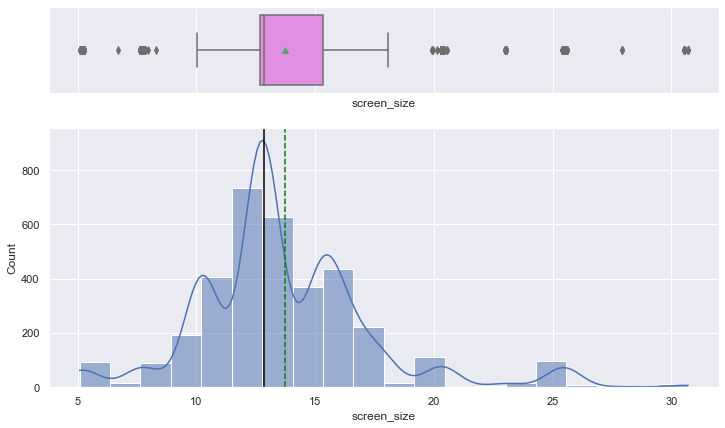

<IPython.core.display.Javascript object>

In [7]:
histogram_boxplot(data, "screen_size", kde=True, bins=20)

## Observation: 
* Not much more big size screen size

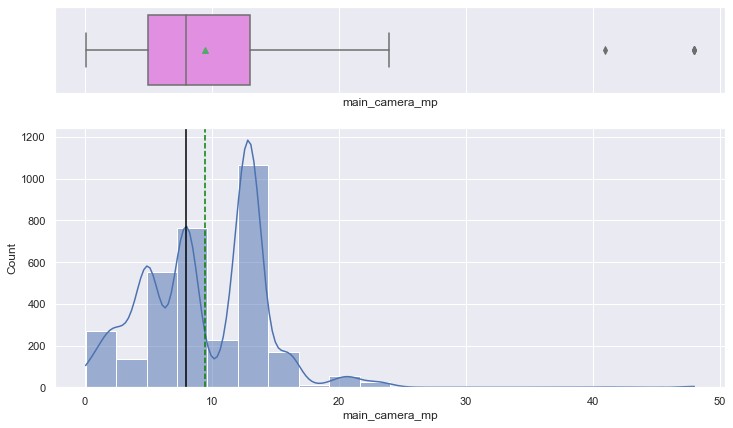

<IPython.core.display.Javascript object>

In [8]:
histogram_boxplot(data, "main_camera_mp", bins=20, kde=True)

## Observation: 
* There are some high values for main camera in some mobiles.
* There are some near zero data 

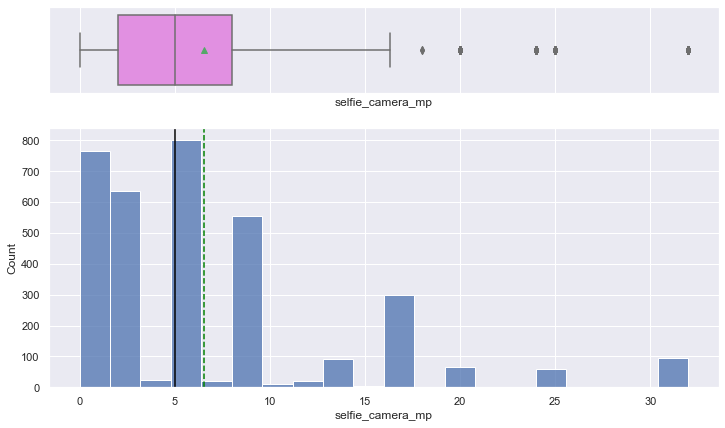

<IPython.core.display.Javascript object>

In [9]:
histogram_boxplot(data, "selfie_camera_mp", bins=20)

## Observation: 
* There are some high values for selfie camera in some mobiles.
* There are near zero data 

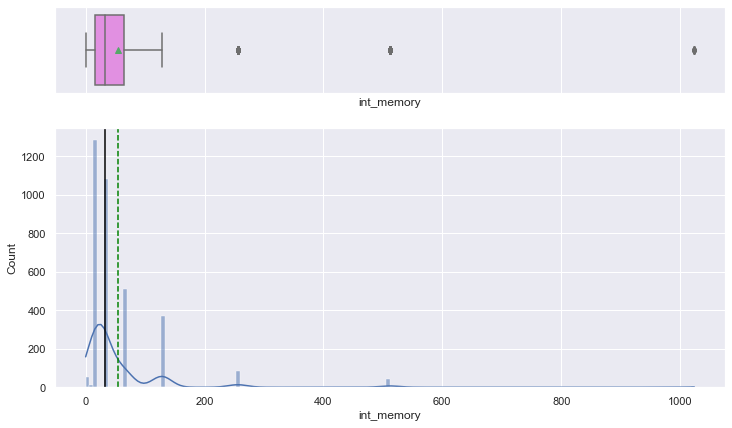

<IPython.core.display.Javascript object>

In [10]:
histogram_boxplot(data, "int_memory", kde=True)

## Observation: 
* There are some high values for internal memory in some mobiles.
* There are near zero data 

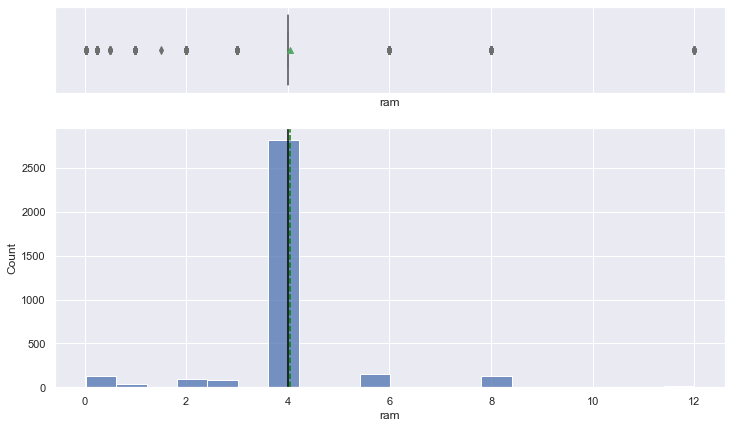

<IPython.core.display.Javascript object>

In [11]:
histogram_boxplot(data, "ram", bins=20)

## Observation: 
* The ram data are discrete varable
* There are some high values for ram in some mobiles.
* There are near zero data 
* Mean and mode are pretty close 

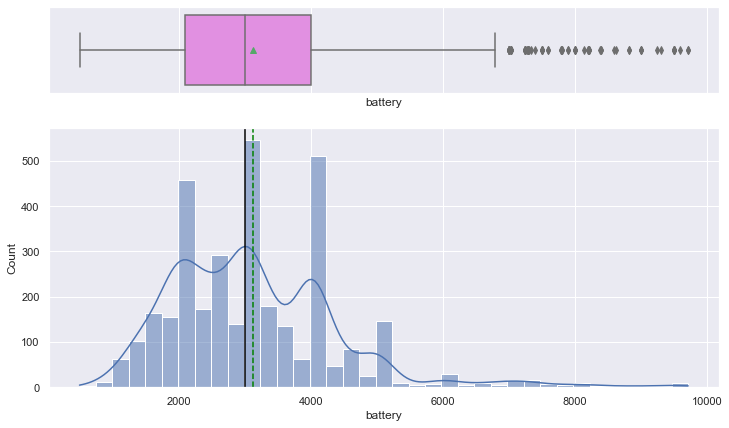

<IPython.core.display.Javascript object>

In [12]:
histogram_boxplot(data, "battery", kde=True)

## Observation: 
* There are some high values for battery in some mobiles.
* Mean and mode are close 

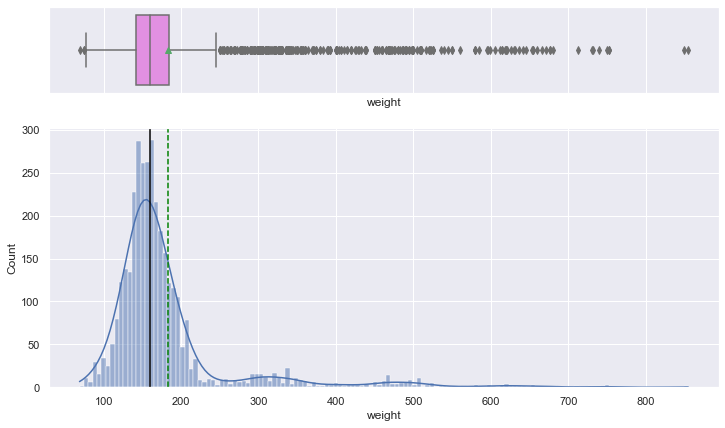

<IPython.core.display.Javascript object>

In [13]:
histogram_boxplot(data, "weight", kde=True)

## Observation: 
* There are some high values for battery in some mobiles.
* Mean and mode are close.
* In outlier detection should be careful.

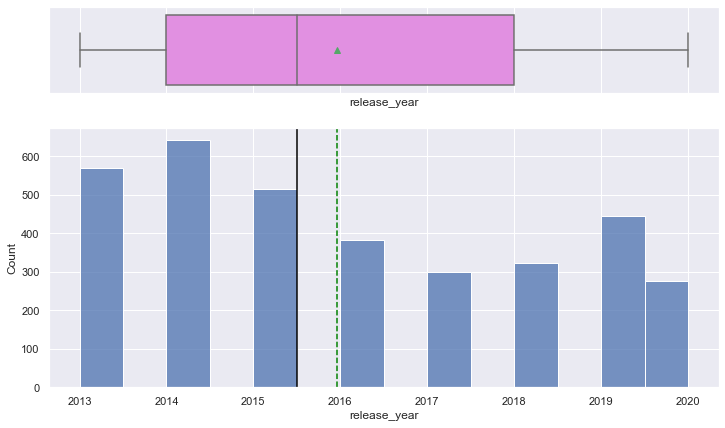

<IPython.core.display.Javascript object>

In [14]:
histogram_boxplot(data, "release_year")

## Observation: 
* The most realse is for year 2014 and the least one for year 2020

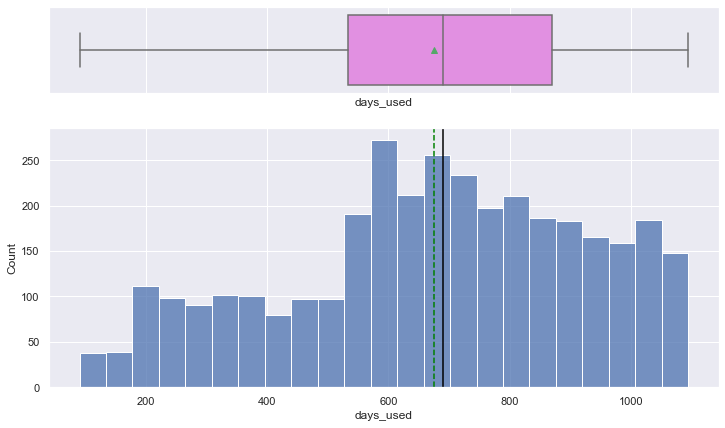

<IPython.core.display.Javascript object>

In [15]:
histogram_boxplot(data, "days_used")

## Observation: 
* Data are skewed to the left
* It seems that there is no anomaly in the data 

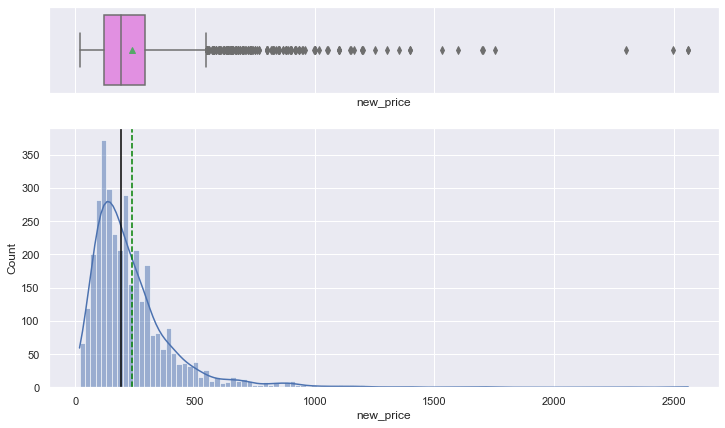

<IPython.core.display.Javascript object>

In [16]:
histogram_boxplot(data, "new_price", kde=True)

## Observation: 
* Data are skewed to the right
* There are some very low cost new mobile devices
* There are some very high cost new mobile devices
* Most of the data are below 500 euros

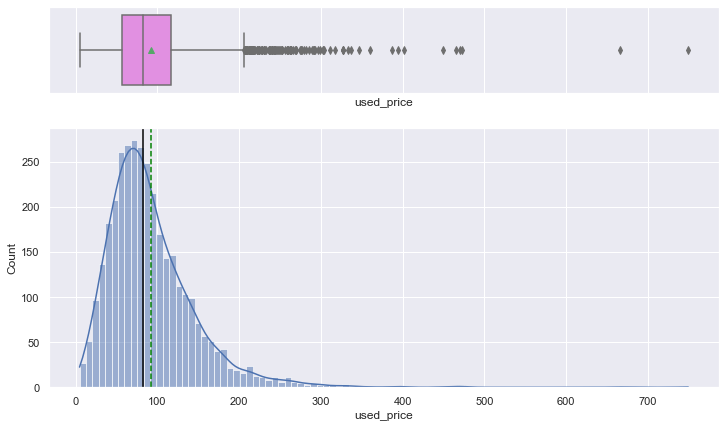

<IPython.core.display.Javascript object>

In [17]:
histogram_boxplot(data, "used_price", kde=True)

## Observation: 
* Data are skewed to the right
* There are some very low cost used mobile devices
* There are some very high cost used mobile devices
* Most of the data are below 250 euros

In [18]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None, **kwargs):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    ## Take into account the presence of a hue variable
    if "hue" in kwargs.keys():
        hue_unique = data[kwargs.get("hue")].nunique()
        count = max(count, hue_unique)

    plt.xticks(rotation=60, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
        **kwargs
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

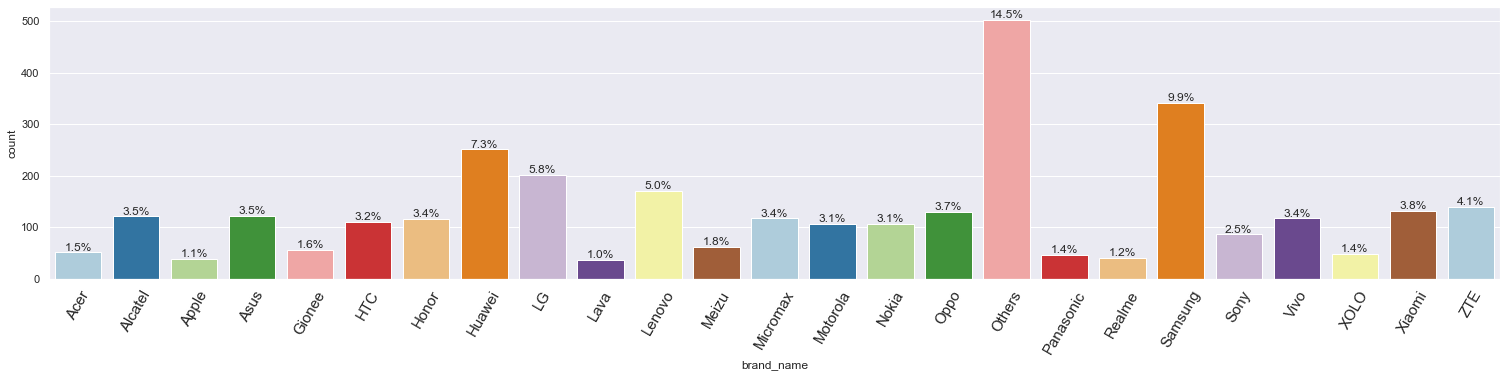

<IPython.core.display.Javascript object>

In [19]:
labeled_barplot(data, "brand_name", perc=True, n=25)

## Observation: 
* The most frequent brand is Samsung
* Around 15% of the data are in other brand category.

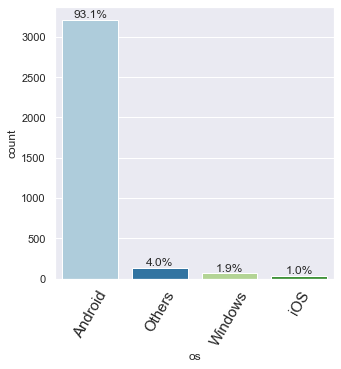

<IPython.core.display.Javascript object>

In [20]:
labeled_barplot(data, "os", perc=True)

## Observation: 
* More than 93% of the devices are using Android operating system. 

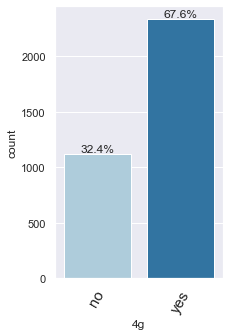

<IPython.core.display.Javascript object>

In [21]:
labeled_barplot(data, "4g", perc=True)

## Observation: 
* Around 70% of the phones/tablets have 4g network

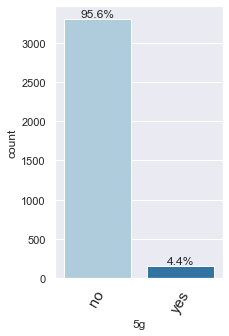

<IPython.core.display.Javascript object>

In [22]:
labeled_barplot(data, "5g", perc=True)

# Observation: 
* less than 5% of the phones/tablets have 5g network

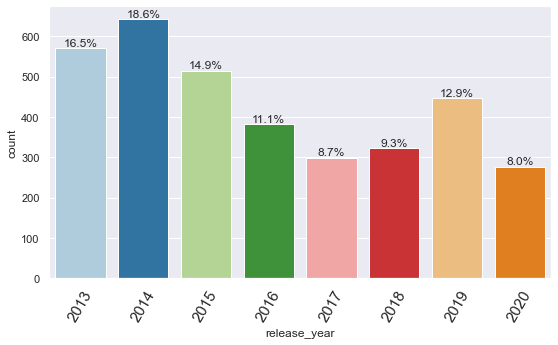

<IPython.core.display.Javascript object>

In [23]:
labeled_barplot(data, "release_year", perc=True)

## Observation: 
* The release devices is more frequent in 2014, from 2013 to 2020. 

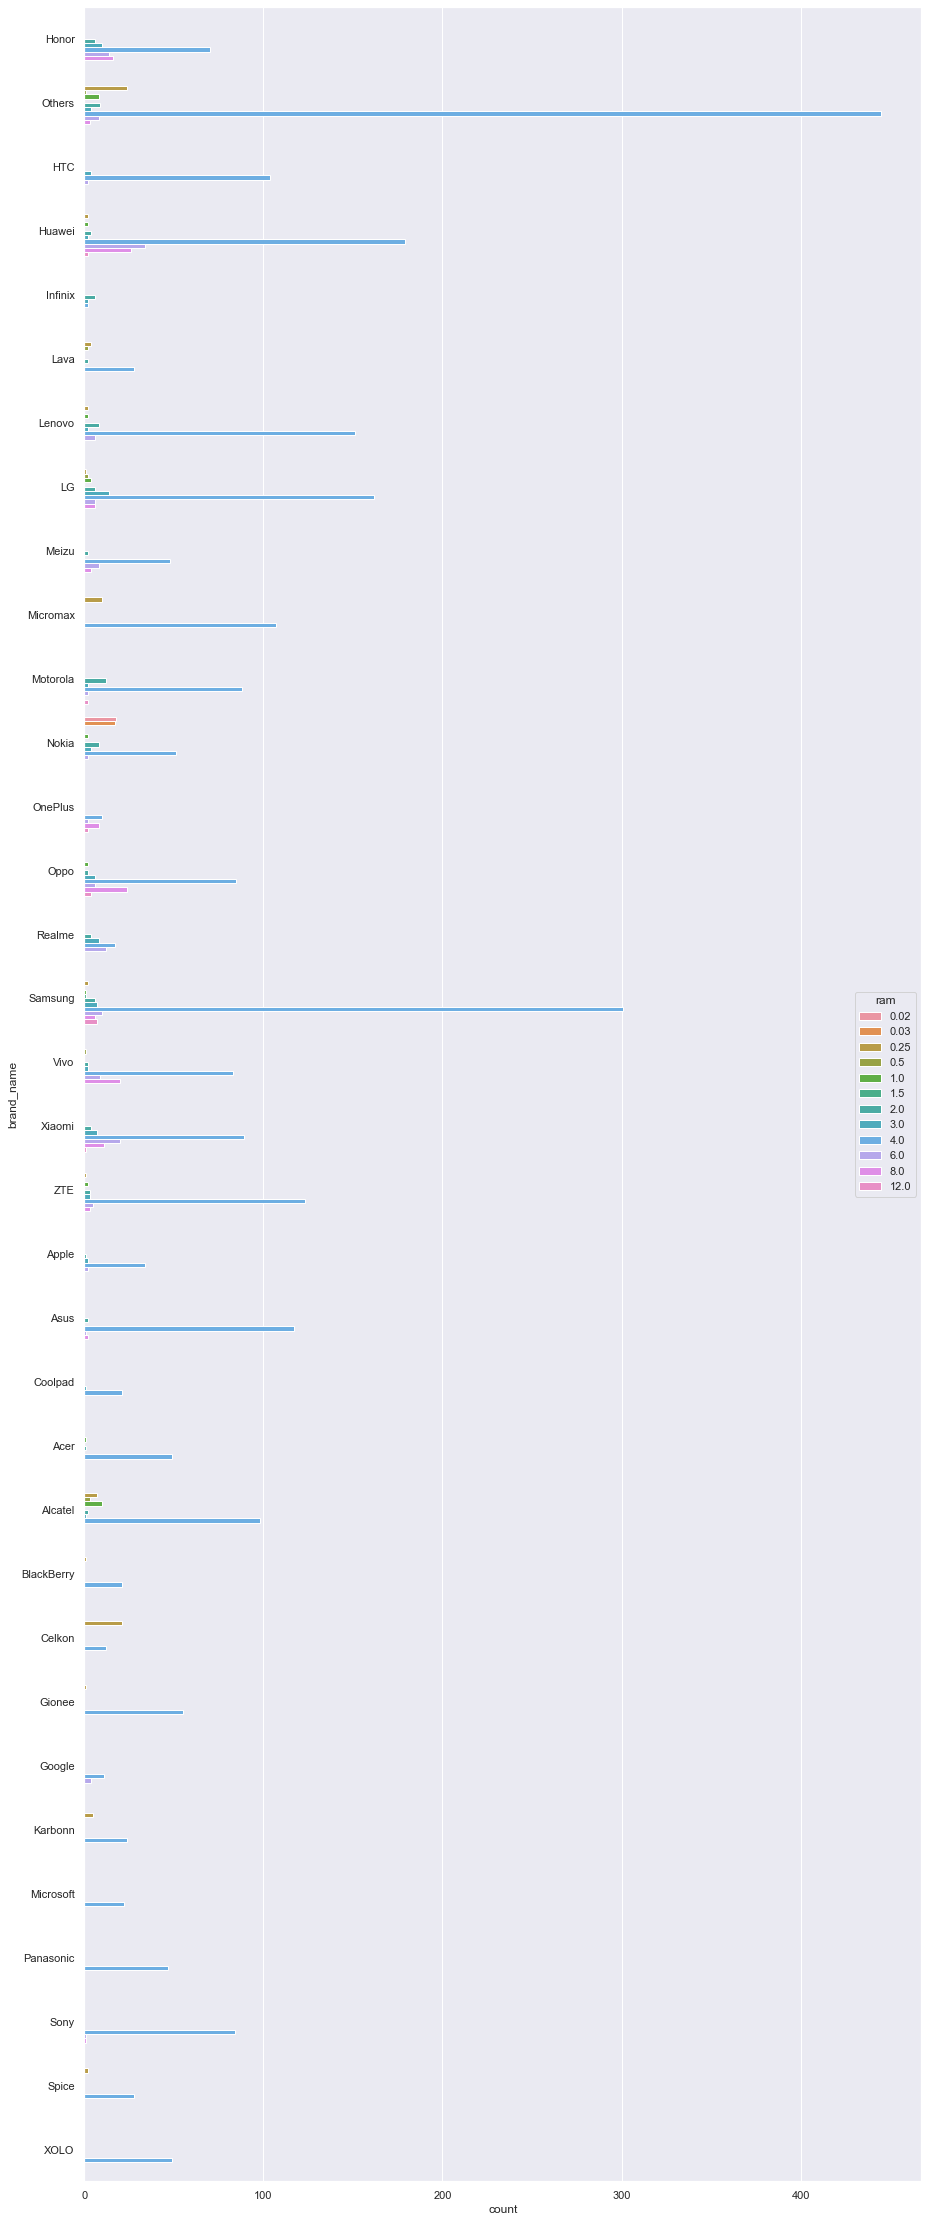

<IPython.core.display.Javascript object>

In [24]:
plt.figure(figsize=(15, 40))
ax = sns.countplot(data=data, y="brand_name", hue="ram",)

plt.show()

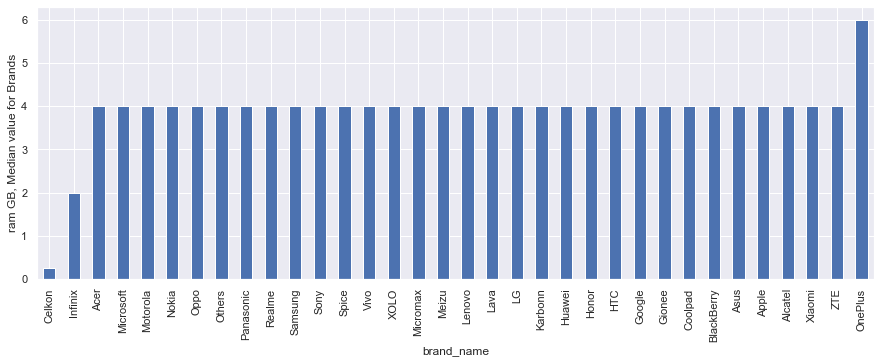

<IPython.core.display.Javascript object>

In [25]:
plt.figure(figsize=(15, 5))
data.groupby("brand_name")["ram"].median().sort_values().plot(
    x="brand_name", y="ram", kind="bar"
)

plt.ylabel("ram GB, Median value for Brands")
plt.show()

## Observation: 
* The above two plots show variation of ram in different brands.
* The most dominant used ram in the devices are 4.
* Acoording to the fisrt plot some brans like Samsung propose different ram for their devices while some just have one option (like: Panasonic)
* According to the second plot Celkon has the lowest and OnePlus has the most ram wrt to the oter brands.

### 3-2 Bivariate Analysis

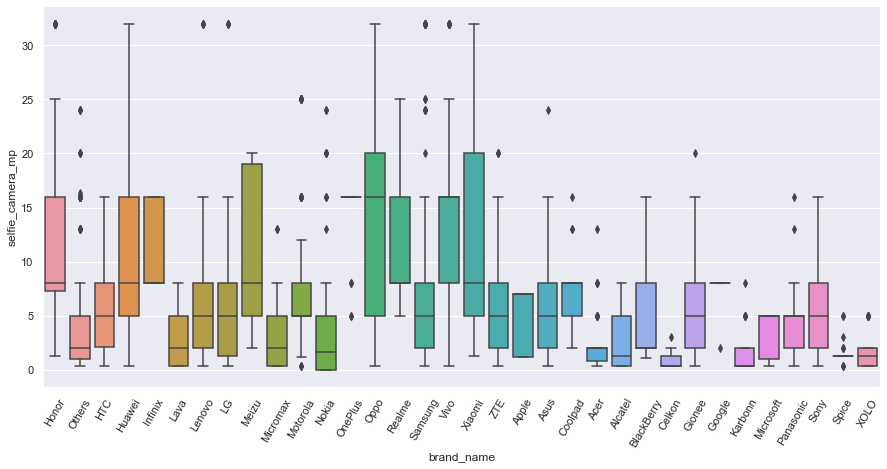

<IPython.core.display.Javascript object>

In [26]:
plt.figure(figsize=(15, 7))
sns.boxplot(x="brand_name", y="selfie_camera_mp", data=data)

plt.xticks(rotation=60)
plt.show()

In [27]:
cols_list = [
    "screen_size",
    "4g",
    "5g",
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
    "days_used",
    "new_price",
    "used_price",
]

<IPython.core.display.Javascript object>

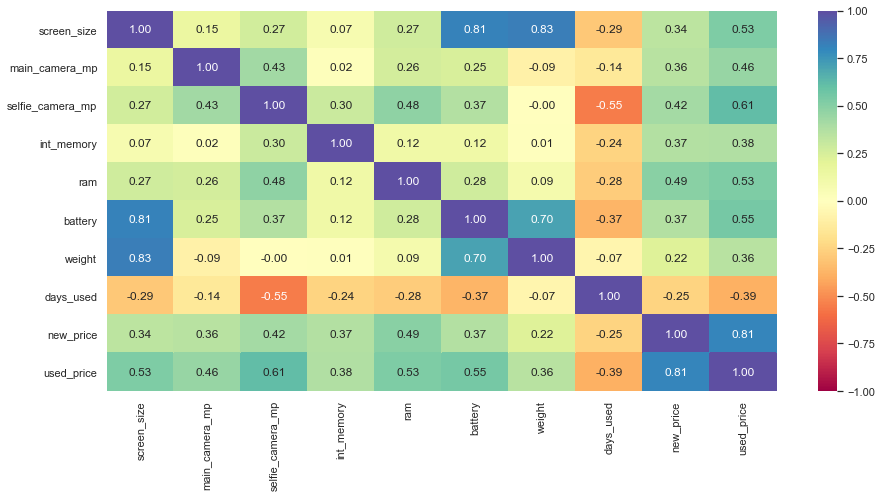

<IPython.core.display.Javascript object>

In [28]:
plt.figure(figsize=(15, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

## Observation: 
* There is very high positive correlation between screen_size and the weight.
* There is very high positive correlation between screen_size and the battery.
* There is high negative correlation between selfie_camera_mp variable and the days_used one.
* There is good negative correlation between battery and the days_used.
* There is good negative correlation between used_price and the days_used.
* There is a positive correlation between used device price and the selfie camera mp. 

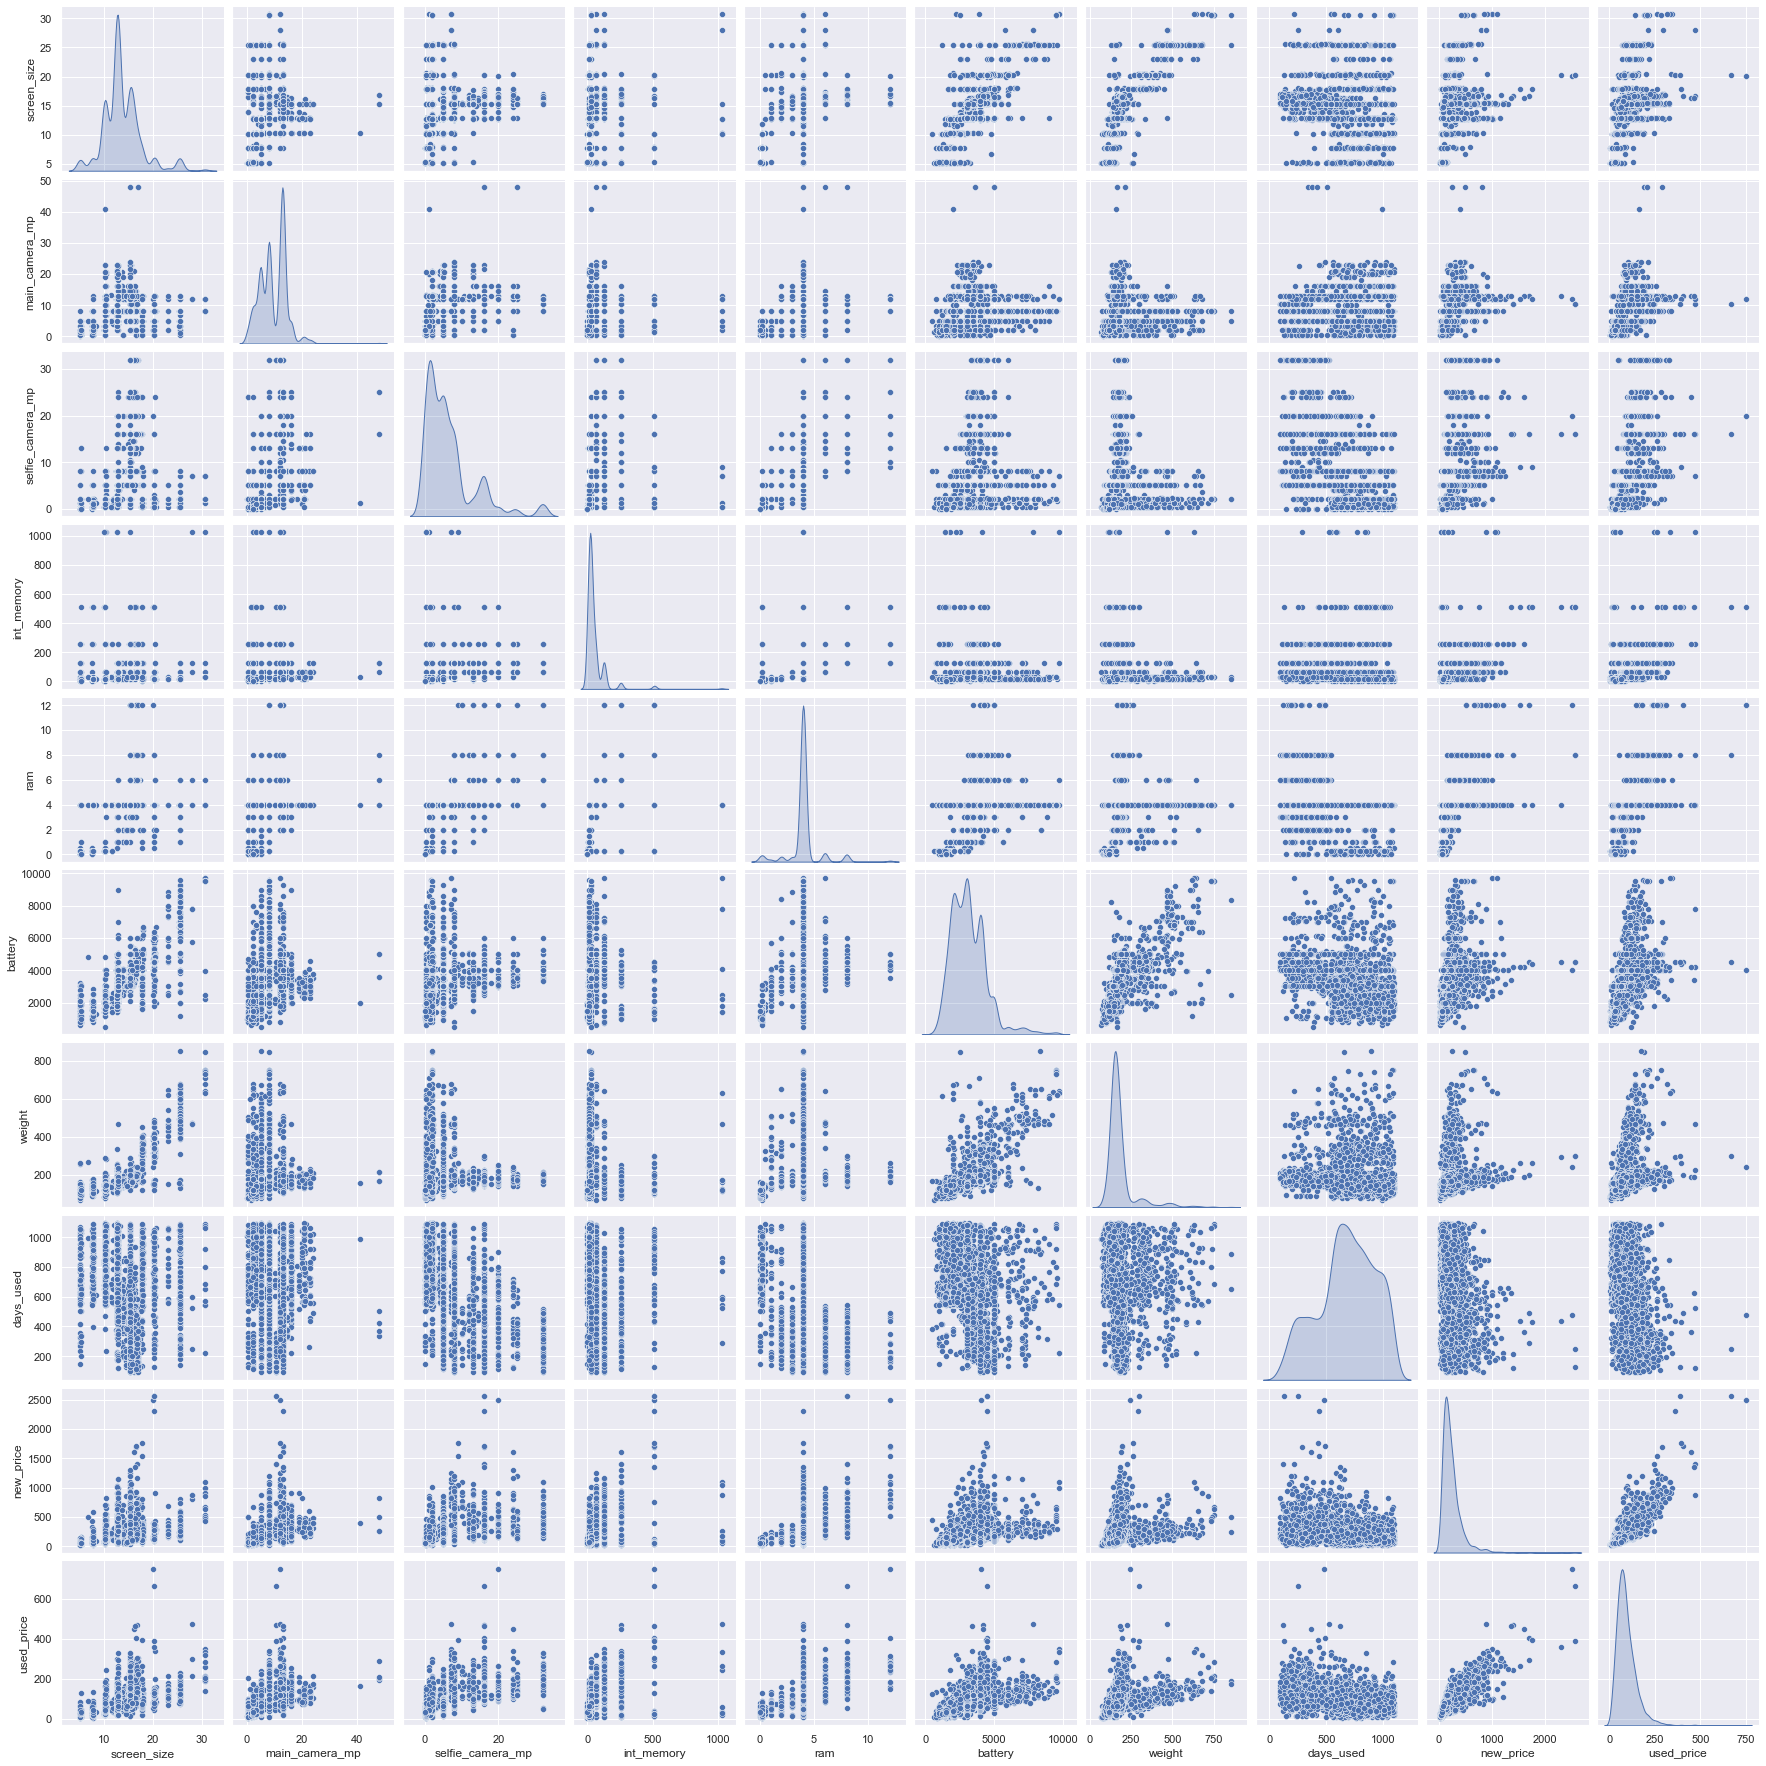

<IPython.core.display.Javascript object>

In [29]:
sns.pairplot(data[cols_list], diag_kind="kde")
plt.show()

## Observation: 
* The same as heatmap 

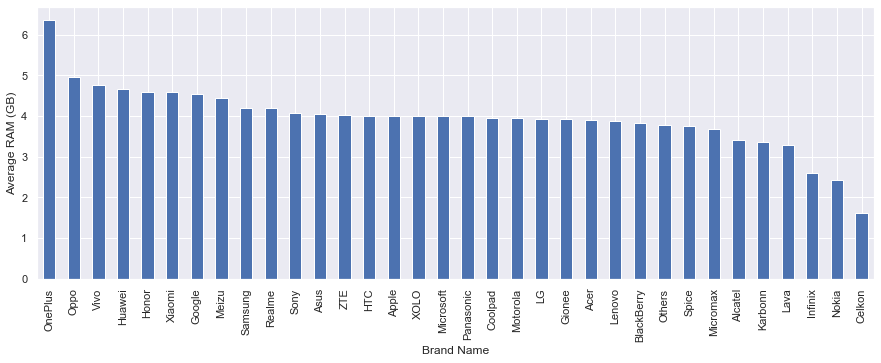

<IPython.core.display.Javascript object>

In [30]:
plt.figure(figsize=(15, 5))
data.groupby(by=["brand_name"])["ram"].mean().sort_values(ascending=False).plot(
    x="brand_name", y="ram", kind="bar", color="b"
)


plt.xlabel("Brand Name")
plt.ylabel("Average RAM (GB)")
plt.show()

## Observation: 
* The average ram used in different brands are shown in above plot.
* As the ram is a discrete value, mean is not a meaningful value for each device. But it can help to see which Brand has the most ram in avergae.  

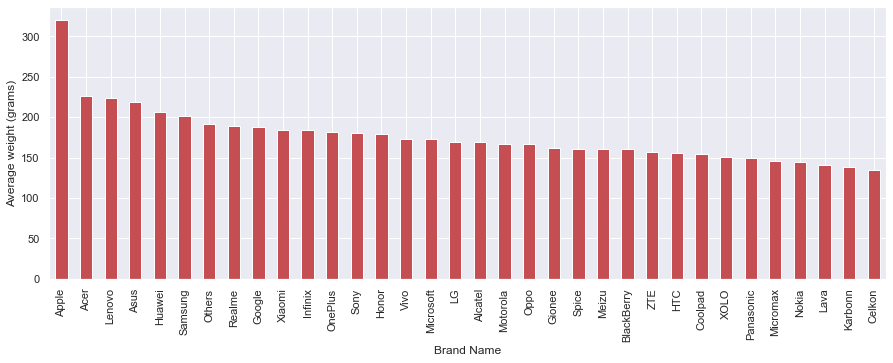

<IPython.core.display.Javascript object>

In [31]:
plt.figure(figsize=(15, 5))
data.groupby(by=["brand_name"])["weight"].mean().sort_values(ascending=False).plot(
    x="brand_name", y="weight", kind="bar", color="r"
)


plt.xlabel("Brand Name")
plt.ylabel("Average weight (grams)")
plt.show()

## Observation: 
* The average weight of the devices in different brands are shown in above plot.
* Apple brand has the most weight amonge the other brands.

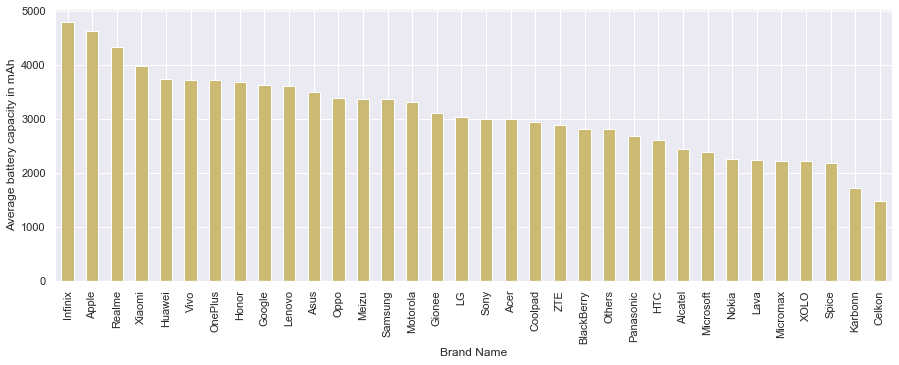

<IPython.core.display.Javascript object>

In [32]:
plt.figure(figsize=(15, 5))
data.groupby(by=["brand_name"])["battery"].mean().sort_values(ascending=False).plot(
    x="brand_name", y="battery", kind="bar", color="y"
)


plt.xlabel("Brand Name")
plt.ylabel("Average battery capacity in mAh")
plt.show()

## Observation: 
* The average battery capacity in different brands are shown in this plot.
* Infinix, Apple and Realme has the most capacity for their battery.

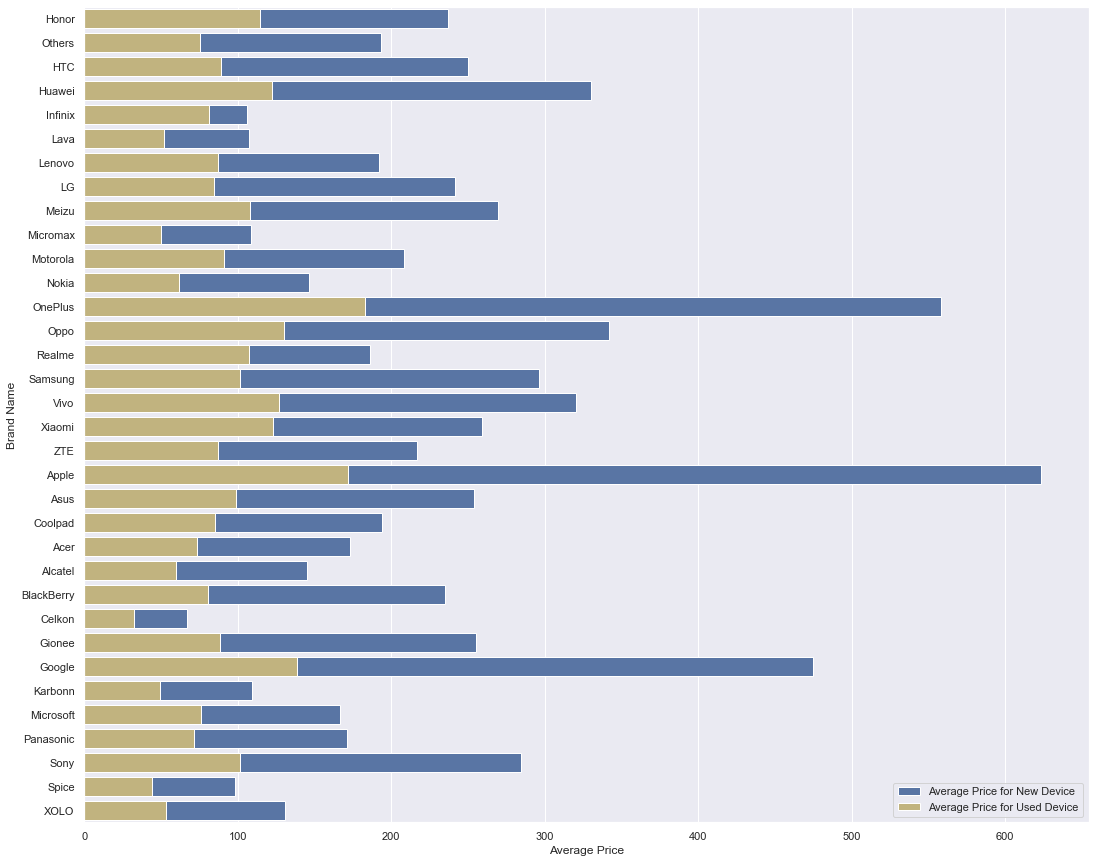

<IPython.core.display.Javascript object>

In [33]:
plt.figure(figsize=(18, 15))  # To resize the plot

# Plot new_price per brand_name
sns.barplot(
    x="new_price",
    y="brand_name",
    data=data,
    label="Average Price for New Device",
    color="b",
    ci=None,
)


# Plot used_price per brand_name
sns.barplot(
    x="used_price",
    y="brand_name",
    data=data,
    label="Average Price for Used Device",
    color="y",
    ci=None,
)


# Add a legend
plt.legend(ncol=1, loc="lower right", frameon=True)
plt.xlabel("Average Price")
plt.ylabel("Brand Name")
plt.show()

## Observation: 
* The price of Apple, OnePlus and Google brand type devices are decreased more in used devices than the other brands.
* This average calculated all the data in one brand (including the most luxury ones and mid-range and low-range ones together)

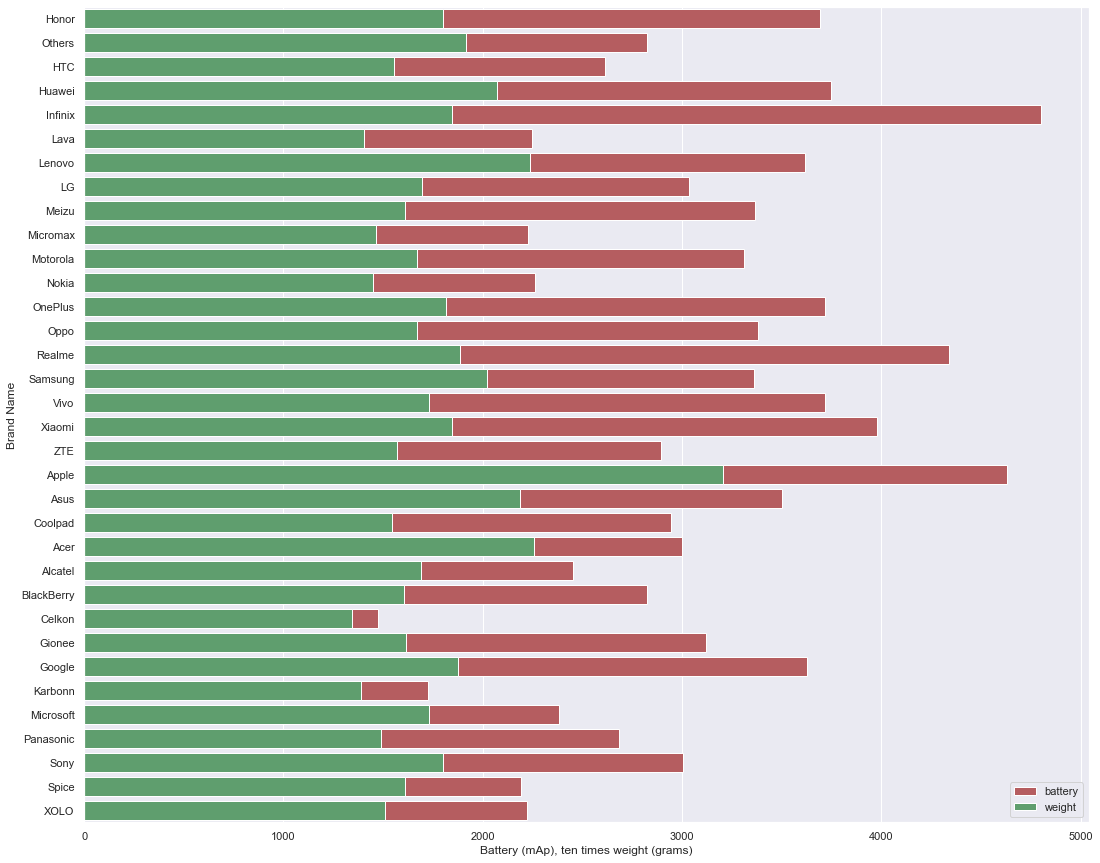

<IPython.core.display.Javascript object>

In [34]:
data["weight_scaled"] = (data["weight"]) * 10
data["battery_scaled"] = (data["battery"]) * 1


plt.figure(figsize=(18, 15))  # To resize the plot

# Plot battery per brand_name
sns.barplot(
    x="battery_scaled", y="brand_name", data=data, label="battery", color="r", ci=None,
)

# Plot scaled weight per brand_name
sns.barplot(
    x="weight_scaled", y="brand_name", data=data, label="weight", color="g", ci=None,
)


# Add a legend
plt.legend(ncol=1, loc="lower right", frameon=True)
plt.xlabel("Battery (mAp), ten times weight (grams)")
plt.ylabel("Brand Name")
plt.show()

del data["weight_scaled"]
del data["battery_scaled"]

## Observation: 
* The average weight values are multiplied by 10 to be comparable by the Battery scale (just visually)
* Three brands (Apple, Realme and Infinix) has battery capacity more than 4000 mAp in average.
* The Apple brand has the most weight between these 3 (it is about the average value).
* The two others weights are comparable wrt the other brands.

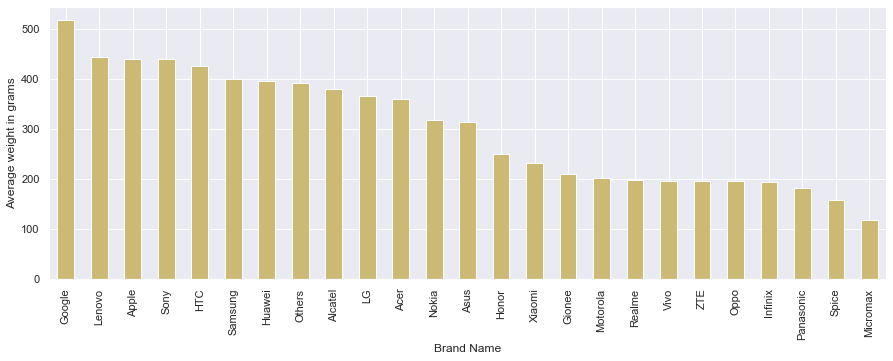

<IPython.core.display.Javascript object>

In [35]:
data_Battery_upper4500 = pd.DataFrame(data.loc[data["battery"] > 4500])

plt.figure(figsize=(15, 5))
data_Battery_upper4500.groupby(by=["brand_name"])["weight"].mean().sort_values(
    ascending=False
).plot(x="brand_name", y="weight", kind="bar", color="y")


plt.xlabel("Brand Name")
plt.ylabel("Average weight in grams")
plt.show()

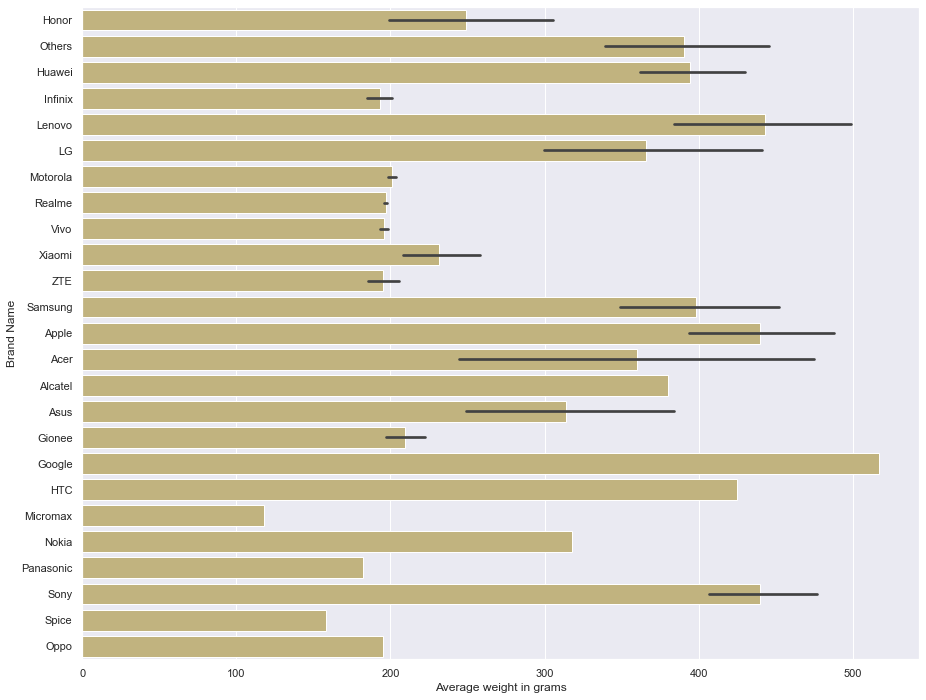

<IPython.core.display.Javascript object>

In [36]:
plt.figure(figsize=(15, 12))
sns.barplot(data=data_Battery_upper4500, x="weight", y="brand_name", color="y")


plt.xlabel("Average weight in grams")
plt.ylabel("Brand Name")
plt.show()

## Observation: 
* In the first step a data frame is generatd for all the data that have battery capacity more than 4500mAp.
* Then the average weight of the mobile/tablet is calculated for each brand.
* The best one by this category is the Micromax which has the lowest average weight.

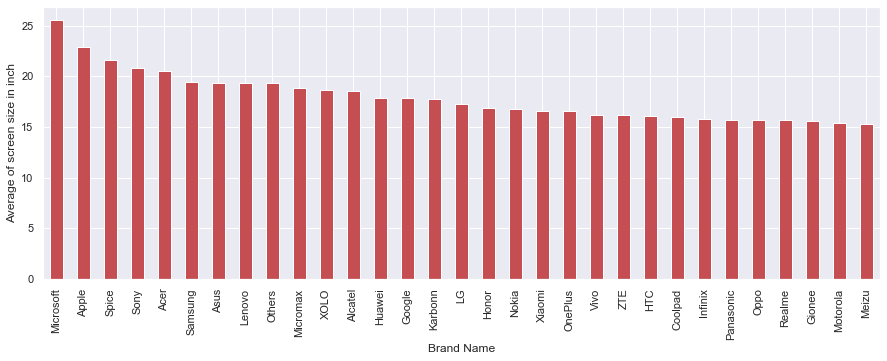

There are 1099 rows in the data


<IPython.core.display.Javascript object>

In [37]:
data_screensize_upper6inch = pd.DataFrame(data.loc[data["screen_size"] > 6 * 2.54])

plt.figure(figsize=(15, 5))
data_screensize_upper6inch.groupby(by=["brand_name"])["screen_size"].mean().sort_values(
    ascending=False
).plot(x="brand_name", y="screen_size", kind="bar", color="r")


plt.xlabel("Brand Name")
plt.ylabel("Average of screen size in inch")
plt.show()


print(f"There are {data_screensize_upper6inch.shape[0]} rows in the data")  # f-string

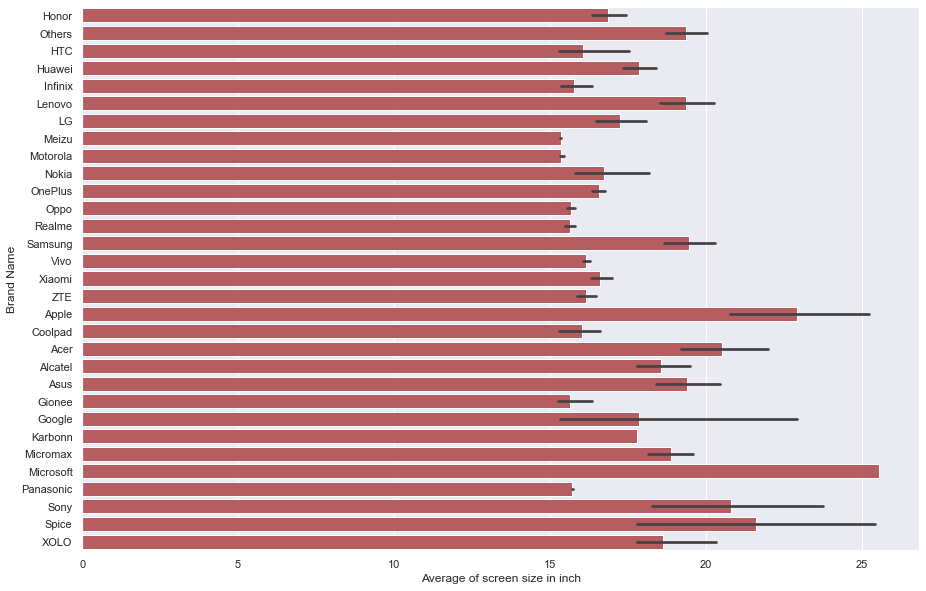

<IPython.core.display.Javascript object>

In [38]:
plt.figure(figsize=(15, 10))
sns.barplot(data=data_screensize_upper6inch, x="screen_size", y="brand_name", color="r")


plt.xlabel("Average of screen size in inch")
plt.ylabel("Brand Name")
plt.show()

## Observation: 
* In the first step a data frame is generatd for all the data that have screen size more than 6in.
* Then the average screen size of the mobile/tablet is calculated for each brand.
* The biggest one by this category is the Microsoft which has the highest average screen size.

In [39]:
data_selfie_camera_mp_upper8mp = pd.DataFrame((data.loc[data["selfie_camera_mp"] > 8]))
data_new_price_lower200 = pd.DataFrame(
    (
        data_selfie_camera_mp_upper8mp.loc[
            data_selfie_camera_mp_upper8mp["new_price"] < 200
        ]
    )
)

<IPython.core.display.Javascript object>

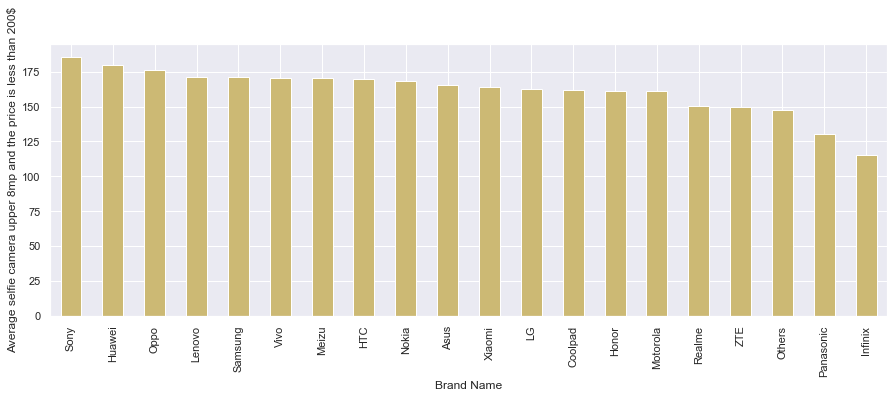

There are 126 rows in the data


<IPython.core.display.Javascript object>

In [40]:
plt.figure(figsize=(15, 5))
data_new_price_lower200.groupby(by=["brand_name"])["new_price"].mean().sort_values(
    ascending=False
).plot(x="brand_name", y="new_price", kind="bar", color="y")


plt.xlabel("Brand Name")
plt.ylabel("Average selfie camera upper 8mp and the price is less than 200$")
plt.show()


print(f"There are {data_new_price_lower200.shape[0]} rows in the data")  # f-string

## Observation: 
* There are 126 devices that has more than 8mp selfie camera and the price is less than 200$.
* The graph above shows the brands that have the above criteria.

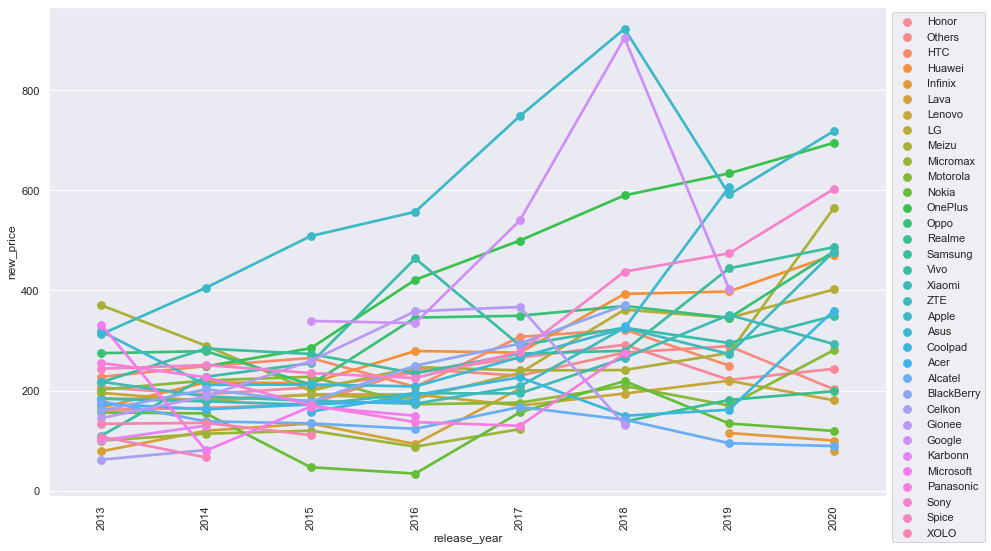

<IPython.core.display.Javascript object>

In [41]:
plt.figure(figsize=(15, 9))  # To resize the plot
sns.pointplot(
    x="release_year", y="new_price", data=data, ci=None, hue="brand_name",
)
plt.legend(bbox_to_anchor=(1, 1))
plt.xticks(rotation=90)  # To rotate the x axis labls
plt.show()

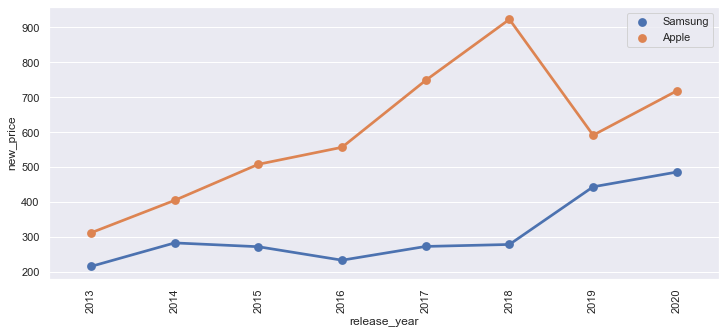

<IPython.core.display.Javascript object>

In [42]:
plt.figure(figsize=(12, 5))  # To resize the plot
sns.pointplot(
    x="release_year",
    y="new_price",
    data=data[data["brand_name"].isin(["Apple", "Samsung"])],
    ci=None,
    hue="brand_name",
)
plt.legend(bbox_to_anchor=(1, 1))
plt.xticks(rotation=90)  # To rotate the x axis labls
plt.show()

## Observation: 
* The above two pictures shows the average of new devices price change per brand type by the year.
* Comparing two brands like Apple and Samsung shows that the average price of the new device has more fluctuation in Samsung brand wrt to Apple one.
* Totally the price of these two brand are increasing during year 2013 to 2020. 

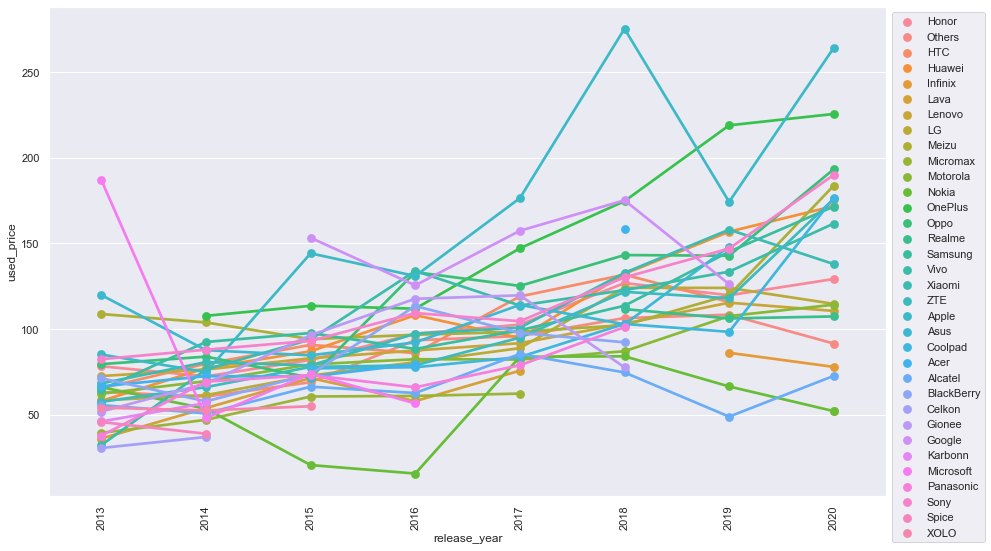

<IPython.core.display.Javascript object>

In [43]:
plt.figure(figsize=(15, 9))  # To resize the plot
sns.pointplot(
    x="release_year", y="used_price", data=data, ci=None, hue="brand_name",
)
plt.legend(bbox_to_anchor=(1, 1))
plt.xticks(rotation=90)  # To rotate the x axis labls
plt.show()

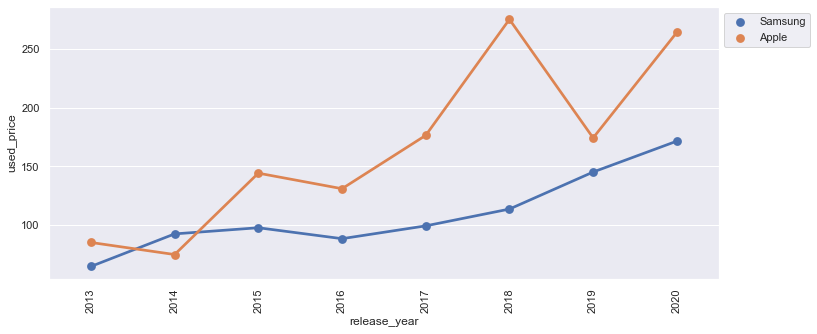

<IPython.core.display.Javascript object>

In [44]:
plt.figure(figsize=(12, 5))  # To resize the plot
sns.pointplot(
    x="release_year",
    y="used_price",
    data=data[data["brand_name"].isin(["Apple", "Samsung"])],
    ci=None,
    hue="brand_name",
)
plt.legend(bbox_to_anchor=(1, 1))
plt.xticks(rotation=90)  # To rotate the x axis labls
plt.show()

## Observation: 
* The above two pictures shows the average of used devices price change per brand type by the year.
* Comparing two brands like Apple and Samsung shows that the average price of the used device has more fluctuation in Samsung brand wrt to Apple one.
* Totally the price of these two brand are increasing during year 2013 to 2020. 

### From the data overview, we see that some columns in the data need to be preprocessed before they can be used for analysis.

# 4- Data Preprocessing
- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### 4-1 Missing value treatment

In [45]:
# looking at which columns have the most missing values
data.isnull().sum().sort_values(ascending=False)

main_camera_mp      179
weight                7
battery               6
int_memory            4
ram                   4
selfie_camera_mp      2
brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64

<IPython.core.display.Javascript object>

# Observation: 
* There are 6 columns with null value.
* 5 out of 6 have few null values which can be solved.
* 1 column 'main_camera_mp' has the most null value in the database.

In [46]:
# Before any correction make a copy original dataset
df = data.copy()

<IPython.core.display.Javascript object>

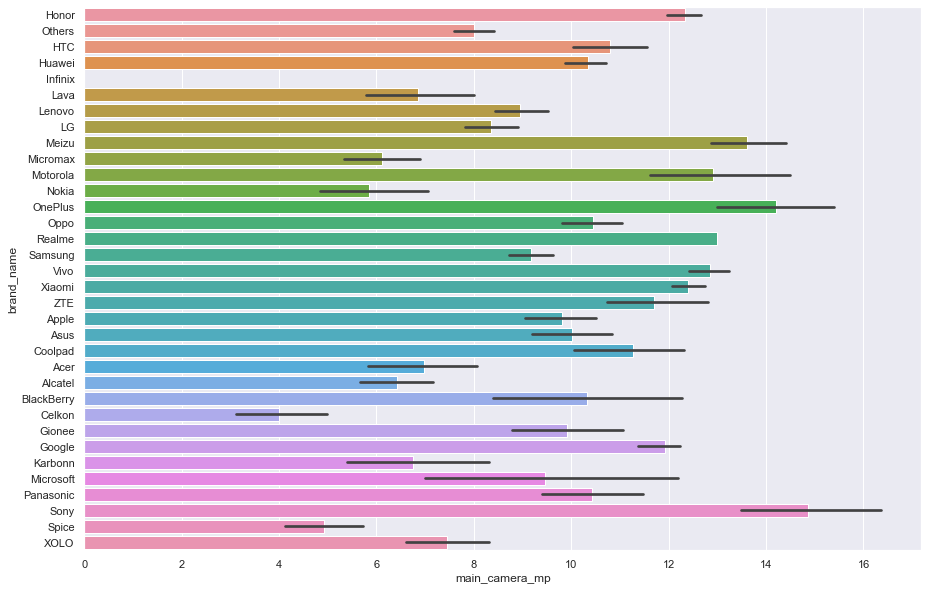

<IPython.core.display.Javascript object>

In [47]:
plt.figure(figsize=(15, 10))
sns.barplot(data=df, x="main_camera_mp", y="brand_name")
plt.show()

In [48]:
df[df["brand_name"] == "Infinix"]

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
59,Infinix,Android,17.32,yes,no,NaN,8.0,32.0,2.0,6000.0,209.0,2020,245,99.25,72.39
60,Infinix,Android,15.39,yes,no,NaN,8.0,64.0,4.0,5000.0,185.0,2020,173,111.25,78.54
61,Infinix,Android,15.39,yes,no,NaN,8.0,32.0,2.0,5000.0,185.0,2020,256,90.51,65.46
62,Infinix,Android,15.39,yes,no,NaN,16.0,32.0,3.0,4000.0,178.0,2019,316,99.70,95.13
63,Infinix,Android,15.29,yes,no,NaN,16.0,32.0,2.0,4000.0,165.0,2019,468,130.49,82.82
278,Infinix,Android,17.32,yes,no,NaN,8.0,32.0,2.0,6000.0,209.0,2020,320,100.02,81.87
279,Infinix,Android,15.39,yes,no,NaN,8.0,64.0,4.0,5000.0,185.0,2020,173,110.18,89.65
280,Infinix,Android,15.39,yes,no,NaN,8.0,32.0,2.0,5000.0,185.0,2020,329,88.88,79.10
281,Infinix,Android,15.39,yes,no,NaN,16.0,32.0,3.0,4000.0,178.0,2019,356,100.08,82.93
282,Infinix,Android,15.29,yes,no,NaN,16.0,32.0,2.0,4000.0,165.0,2019,497,129.81,83.37


<IPython.core.display.Javascript object>

# Observation: 
* Based on the above analysis main_camera_mp has the most missing value.
* The missing values for all the brands can be replaced by its mean value.
* Only the Infinix brand does not have any value for main_camera_mp.

In [49]:
df1 = df.copy()  # make a copy of original data

df1["main_camera_mp"] = df1.groupby(["brand_name"])["main_camera_mp"].transform(
    lambda x: x.fillna(x.median())
)

df1.isnull().sum()

brand_name           0
os                   0
screen_size          0
4g                   0
5g                   0
main_camera_mp      10
selfie_camera_mp     2
int_memory           4
ram                  4
battery              6
weight               7
release_year         0
days_used            0
new_price            0
used_price           0
dtype: int64

<IPython.core.display.Javascript object>

# Observation: 
* The missing value for main_camera_mp is replaced by median of each brand.
* As mentioned above, it is not possible to find this value for Infinix brand which there is no data for main_camera_mp.
* If we drop the data from main_camrea_mp, all the data for one brand will be dropped.

In [50]:
df1[df1["brand_name"] == "Infinix"]

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
59,Infinix,Android,17.32,yes,no,NaN,8.0,32.0,2.0,6000.0,209.0,2020,245,99.25,72.39
60,Infinix,Android,15.39,yes,no,NaN,8.0,64.0,4.0,5000.0,185.0,2020,173,111.25,78.54
61,Infinix,Android,15.39,yes,no,NaN,8.0,32.0,2.0,5000.0,185.0,2020,256,90.51,65.46
62,Infinix,Android,15.39,yes,no,NaN,16.0,32.0,3.0,4000.0,178.0,2019,316,99.70,95.13
63,Infinix,Android,15.29,yes,no,NaN,16.0,32.0,2.0,4000.0,165.0,2019,468,130.49,82.82
278,Infinix,Android,17.32,yes,no,NaN,8.0,32.0,2.0,6000.0,209.0,2020,320,100.02,81.87
279,Infinix,Android,15.39,yes,no,NaN,8.0,64.0,4.0,5000.0,185.0,2020,173,110.18,89.65
280,Infinix,Android,15.39,yes,no,NaN,8.0,32.0,2.0,5000.0,185.0,2020,329,88.88,79.10
281,Infinix,Android,15.39,yes,no,NaN,16.0,32.0,3.0,4000.0,178.0,2019,356,100.08,82.93
282,Infinix,Android,15.29,yes,no,NaN,16.0,32.0,2.0,4000.0,165.0,2019,497,129.81,83.37


<IPython.core.display.Javascript object>

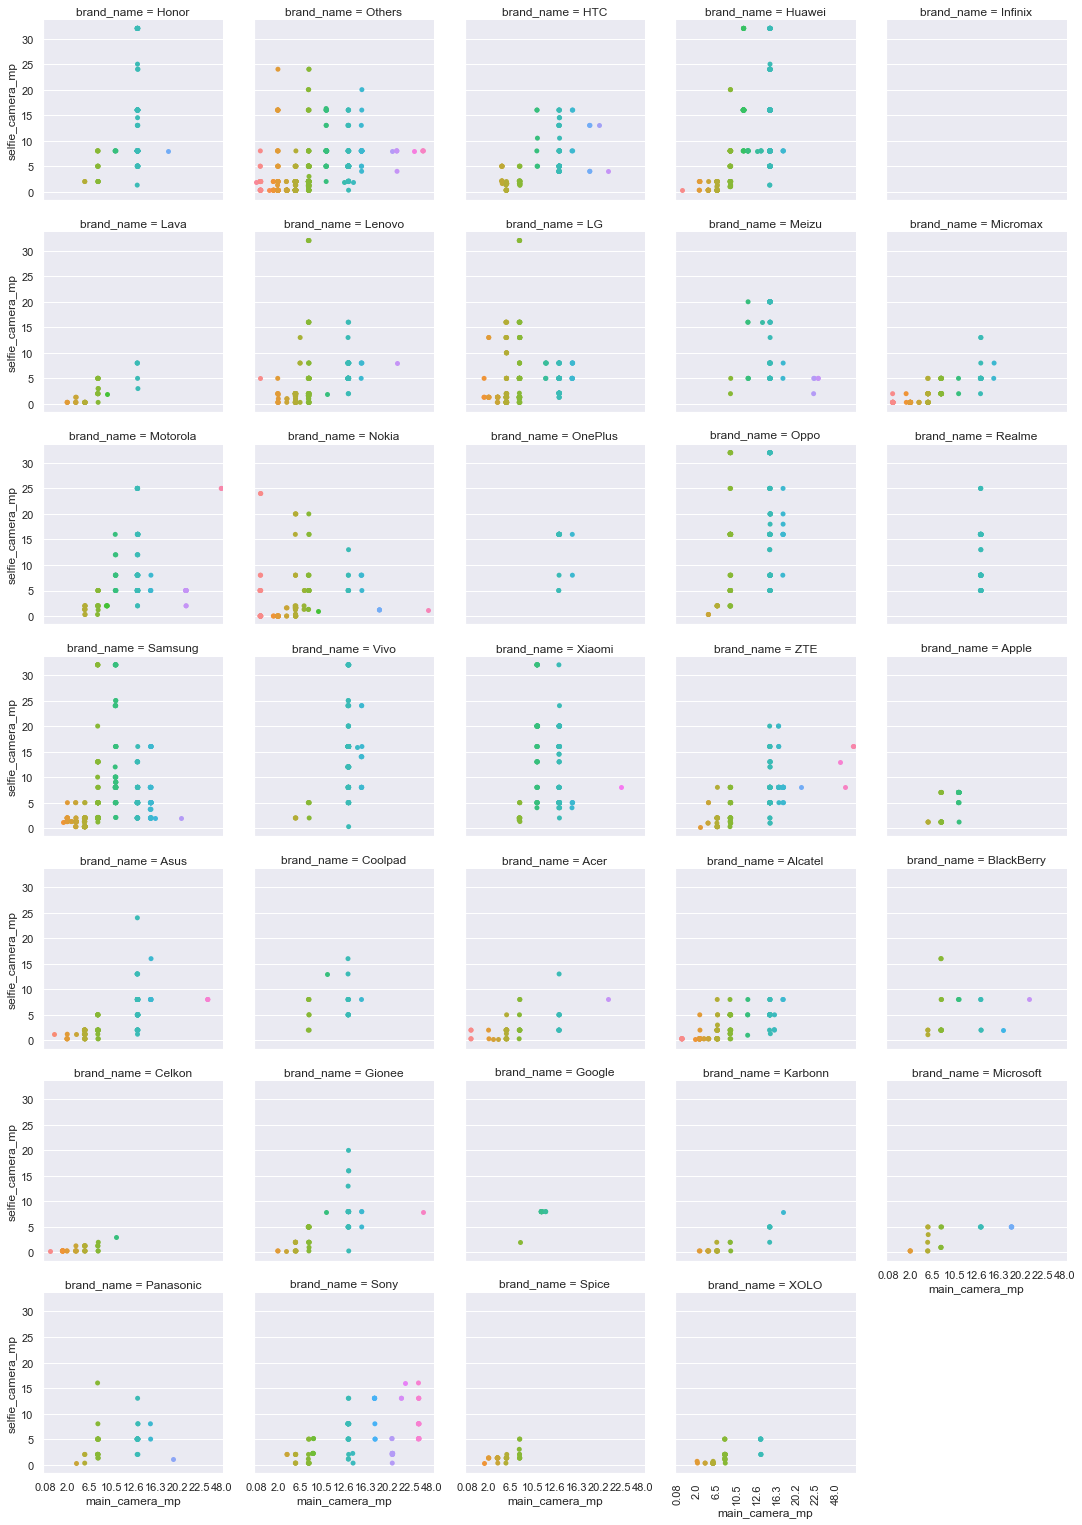

<IPython.core.display.Javascript object>

In [51]:
sns.catplot(
    x="main_camera_mp",
    y="selfie_camera_mp",
    data=df1,
    col="brand_name",
    height=3,
    col_wrap=5,
)

plt.xticks(rotation=90)
plt.xticks(np.arange(0, 50, step=5))
plt.show()

# Observation: 
* There is no relation between selfie camera and the main for all brands.
* It is possible to analize selfie camera with the main ones for each brand, but we can not use one of them for Infinix.

In [52]:
df1.dropna(subset=["main_camera_mp"], inplace=True)
df1.isnull().sum()

brand_name          0
os                  0
screen_size         0
4g                  0
5g                  0
main_camera_mp      0
selfie_camera_mp    2
int_memory          4
ram                 4
battery             6
weight              7
release_year        0
days_used           0
new_price           0
used_price          0
dtype: int64

<IPython.core.display.Javascript object>

# Observation: 
* The brand Infinix is dropped as there is no information regarding main_camera_mp 

In [53]:
df1["selfie_camera_mp"] = df1.groupby(["brand_name"])["selfie_camera_mp"].transform(
    lambda x: x.fillna(x.median())
)

df1["int_memory"] = df1.groupby(["brand_name"])["int_memory"].transform(
    lambda x: x.fillna(x.median())
)

df1["ram"] = df1.groupby(["brand_name"])["ram"].transform(
    lambda x: x.fillna(x.median())
)

df1["battery"] = df1.groupby(["brand_name"])["battery"].transform(
    lambda x: x.fillna(x.mean())
)

df1["weight"] = df1.groupby(["brand_name"])["weight"].transform(
    lambda x: x.fillna(x.mean())
)

df1.isnull().sum()

brand_name          0
os                  0
screen_size         0
4g                  0
5g                  0
main_camera_mp      0
selfie_camera_mp    0
int_memory          0
ram                 0
battery             0
weight              0
release_year        0
days_used           0
new_price           0
used_price          0
dtype: int64

<IPython.core.display.Javascript object>

## Observation: 
* With the same procedure used for main_camera_mp the missing values for other numerical variable is replaced.
* For the selfie_camera_mp, int_memory and ram variable median function is used and for the rest mean one is used.
* Now there is no missing value in the dataset.

### 4-2 Feature engineering

In [54]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3444.0,13.707184,3.808973,5.08,12.7000,12.830,15.340,30.71
main_camera_mp,3444.0,9.622294,4.755529,0.08,5.0000,8.000,13.000,48.00
selfie_camera_mp,3444.0,6.541580,6.970849,0.00,2.0000,5.000,8.000,32.00
int_memory,3444.0,54.575258,85.049276,0.01,16.0000,32.000,64.000,1024.00
ram,3444.0,4.040250,1.363412,0.02,4.0000,4.000,4.000,12.00
battery,3444.0,3128.042617,1296.946746,500.00,2100.0000,3000.000,4000.000,9720.00
weight,3444.0,182.682588,88.459879,69.00,142.0000,160.000,185.000,855.00
release_year,3444.0,2015.954704,2.293263,2013.00,2014.0000,2015.000,2018.000,2020.00
days_used,3444.0,675.919570,248.112174,91.00,537.7500,691.000,870.000,1094.00
new_price,3444.0,237.419283,194.454796,18.20,120.4150,189.850,291.410,2560.20


<IPython.core.display.Javascript object>

In [55]:
df1["device_category"] = pd.cut(
    x=df1.new_price,
    bins=[-np.infty, 200, 350, np.infty],
    labels=["Budget", "Mid-range", "Premium"],
)

df1["device_category"].value_counts()

Budget       1834
Mid-range    1025
Premium       585
Name: device_category, dtype: int64

<IPython.core.display.Javascript object>

## Observation: 
* Create a new column device_category from the new_price column to tag devices as budget, mid-range, and premium

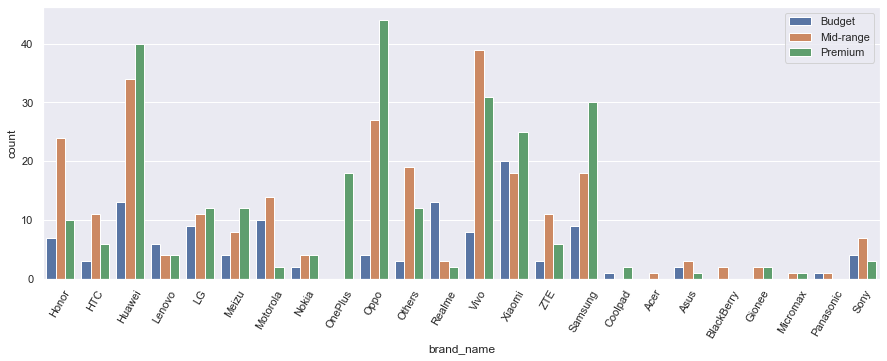

<IPython.core.display.Javascript object>

In [56]:
df_selfie_camera = df1.loc[df1["selfie_camera_mp"] > 8]

plt.figure(figsize=(15, 5))
sns.countplot(data=df_selfie_camera, x="brand_name", hue="device_category")

plt.xticks(rotation=60)
plt.legend(loc=1)
plt.show()

## Observation: 
* The devices that has more than 8mp selfie camera based on price.
* Xiaomi has the most amount of budget range price devices.
* Vivo has the most amount Mid-range price devices.
* Oppo has the most amount Premium price devices.

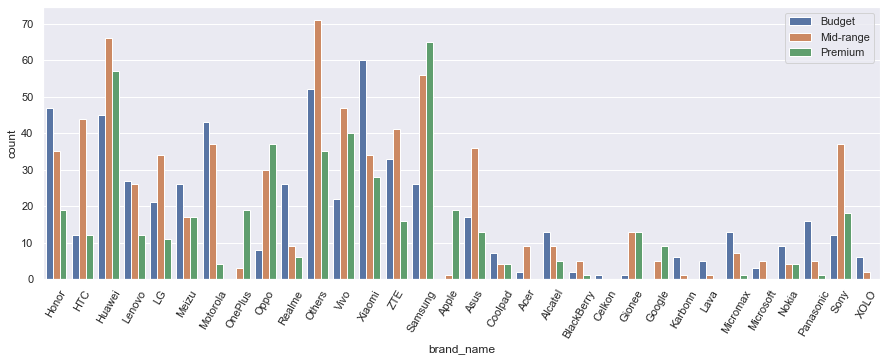

<IPython.core.display.Javascript object>

In [57]:
df_main_camera = df1.loc[df1["main_camera_mp"] > 8]

plt.figure(figsize=(15, 5))
sns.countplot(data=df_main_camera, x="brand_name", hue="device_category")

plt.xticks(rotation=60)
plt.legend(loc=1)
plt.show()

## Observation: 
* The devices that has more than 8mp main camera based on price.
* Again, Xiaomi has the most amount of budget range price devices.
* Huawei has the most amount Mid-range price devices.
* Samsung has the most amount Premium price devices.

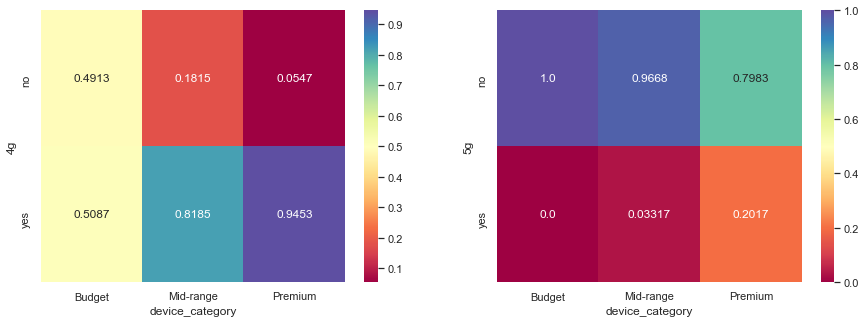

<IPython.core.display.Javascript object>

In [58]:
plt.figure(figsize=(15, 5))

plt.subplot(121)
sns.heatmap(
    pd.crosstab(df1["4g"], df1["device_category"], normalize="columns"),
    annot=True,
    fmt=".4f",
    cmap="Spectral",
)

plt.subplot(122)
sns.heatmap(
    pd.crosstab(df1["5g"], df1["device_category"], normalize="columns"),
    annot=True,
    fmt=".4",
    cmap="Spectral",
)

plt.show()

## Observation: 
* 95% of the Premium range devices has 4g.
* 20% of the Premium range devices has 5g.
* No device found with 5g in Budget range devices. (It means with up to 200$ no device can be found with 5g)

### 4-3 Transformation

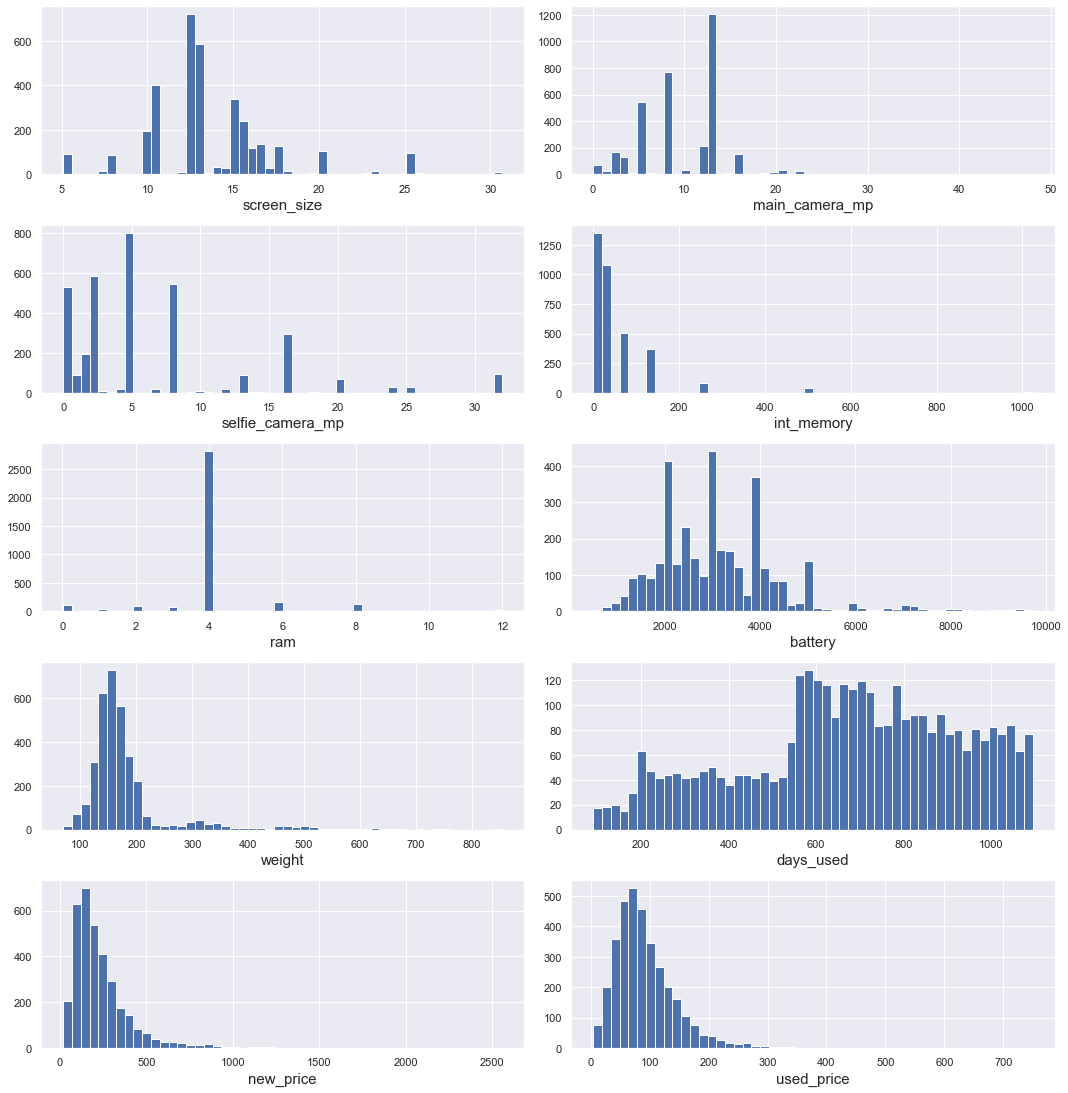

<IPython.core.display.Javascript object>

In [59]:
# creating a list of numeric columns
dist_cols = [item for item in df1.select_dtypes(include=np.number).columns.tolist()]

# dropping release_year as it is a temporal variable
dist_cols.remove("release_year")


# let's plot a histogram of all numeric columns

plt.figure(figsize=(15, 30))

for i in range(len(dist_cols)):
    plt.subplot(10, 2, i + 1)
    plt.hist(df1[dist_cols[i]], bins=50)
    plt.tight_layout()
    plt.xlabel(dist_cols[i], fontsize=15)

plt.show()


## Observation: 
* The distribution of numeric data are shown above.

In [60]:
df2 = df1.copy()

# applying log transform
for col in dist_cols:
    df2[col + "_log"] = np.log(df2[col] + 1)

# dropping the original columns
df2.drop(dist_cols, axis=1, inplace=True)

<IPython.core.display.Javascript object>

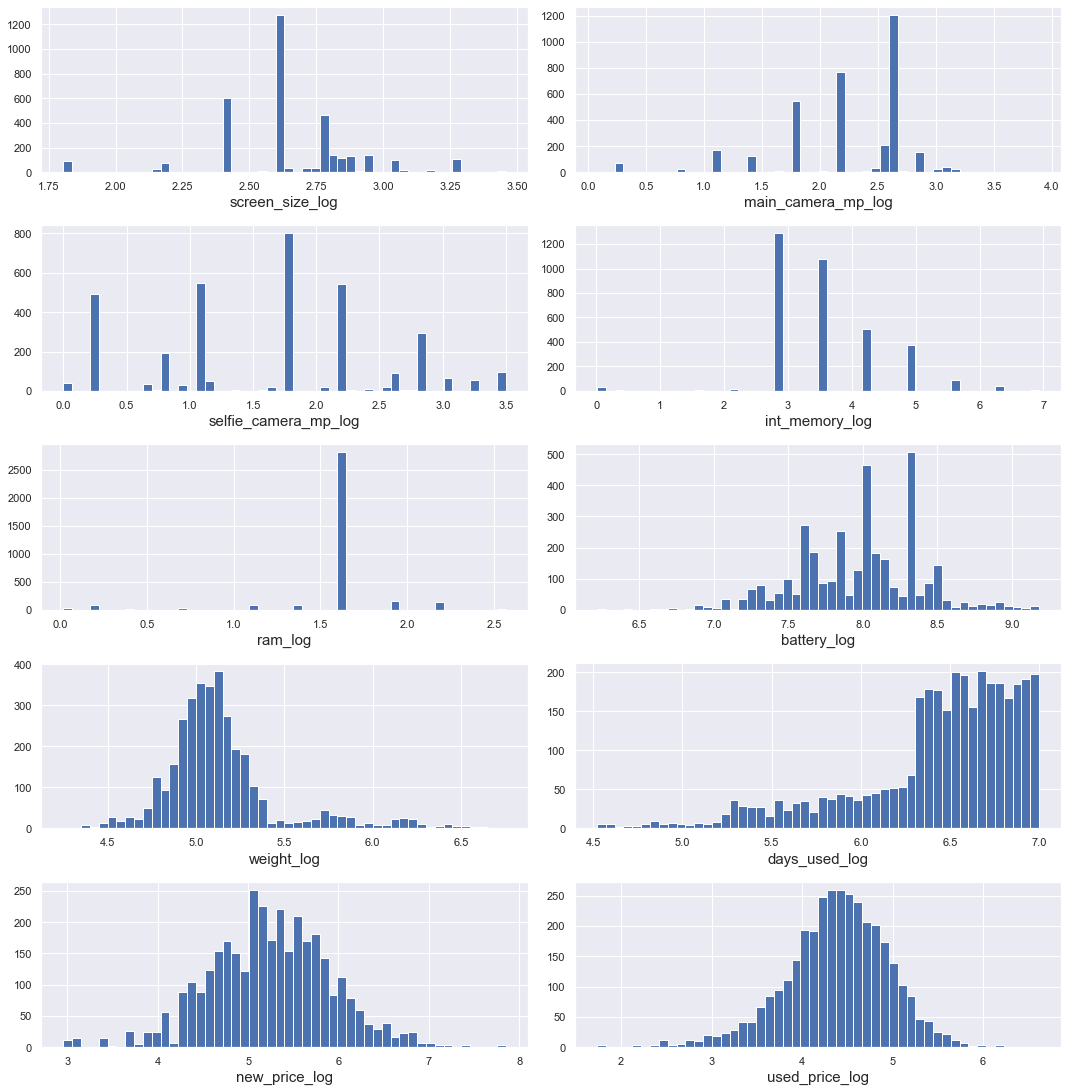

<IPython.core.display.Javascript object>

In [61]:
new_dist_cols = [item + "_log" for item in dist_cols]

plt.figure(figsize=(15, 30))

for i in range(len(dist_cols)):
    plt.subplot(10, 2, i + 1)
    plt.hist(df2[new_dist_cols[i]], bins=50)
    plt.tight_layout()
    plt.xlabel(new_dist_cols[i], fontsize=15)

plt.show()

## Observation: 
* The log transformation of the data are shown in these graphs.
* Not too much improvement to make the distribution of data better.
* Non of the data will be changed to log domain. 

In [62]:
df2 = df1.copy()

dist_cols_selected = ["int_memory"]
# applying log transform
for col in dist_cols_selected:
    df2[col + "_log"] = np.log(df2[col] + 1)

# dropping the original columns
df2.drop(dist_cols_selected, axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [63]:
cols_list_detection = [
    "int_memory_log",
    "ram",
    "battery",
    "weight",
    "used_price",
]

<IPython.core.display.Javascript object>

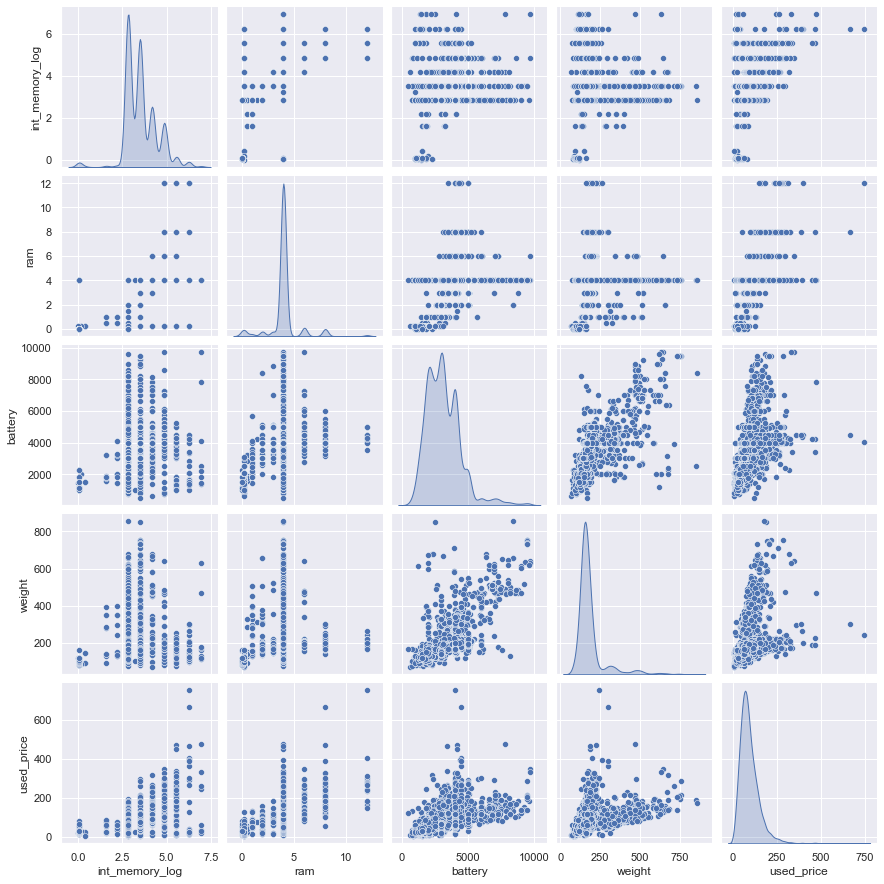

<IPython.core.display.Javascript object>

In [64]:
sns.pairplot(df2[cols_list_detection], diag_kind="kde")
plt.show()

## Observation: 
* The log domain for int_memory is working properly. 
* But because this data is discreate it is decided to use the original data without transformation. 

### 4-4 Outlier Detection

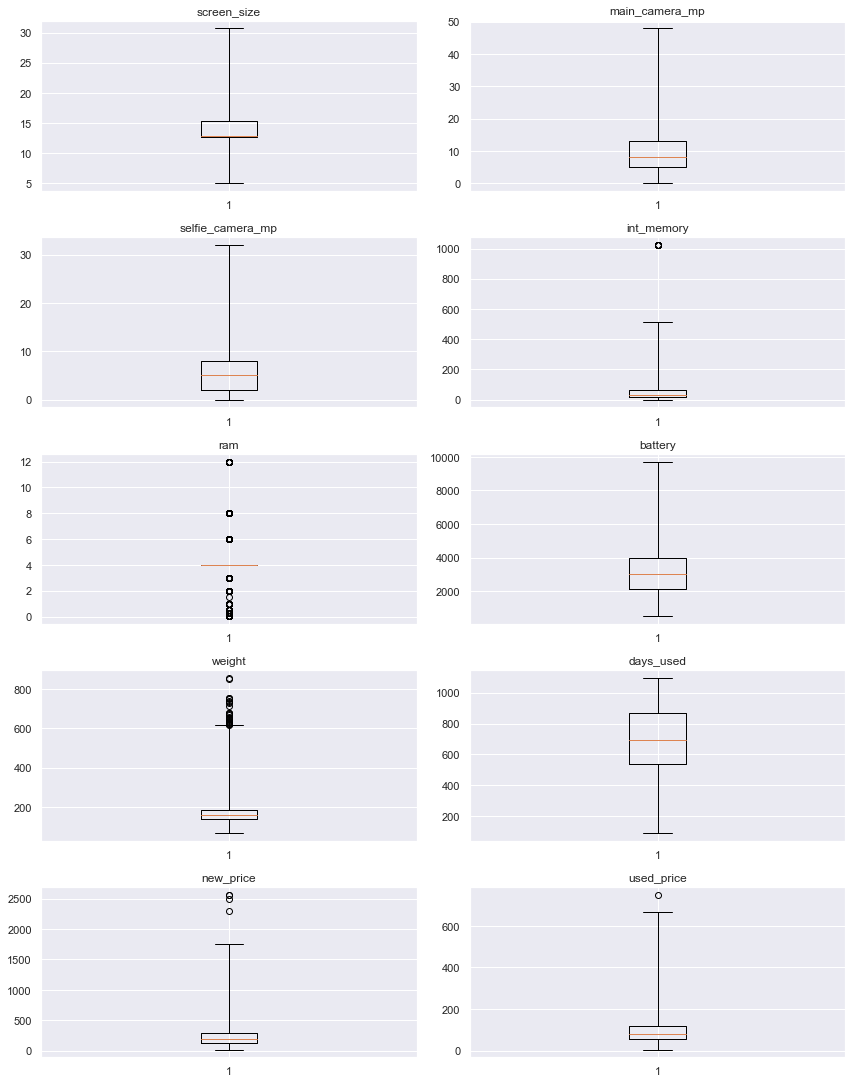

<IPython.core.display.Javascript object>

In [65]:
# outlier detection using boxplot
numeric_columns = df1.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
numeric_columns.remove("release_year")

plt.figure(figsize=(12, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(10, 2, i + 1)
    plt.boxplot(df1[variable], whis=10)
    plt.tight_layout()
    plt.title(variable)

plt.show()

## Observation: 
* Some data shows the outliers in the graphs.
* Now we have to eliminate these values from the data.

* I will treat these outliers by flooring and capping, i.e., we will replace the
    - lower outliers by Q1 - 1.5IQR.
    - upper outliers by Q3 + 1.5IQR.

* Note: We will not treat outliers in the ram column as doing so will remove the variation in the column and most likely make it a constant, which is not desirable. Also this variable is discrete which should not be treated in outlier detection.

In [66]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

<IPython.core.display.Javascript object>

In [67]:
df3 = df1.copy()
treat_out_cols = ["new_price", "used_price", "weight"]

df3 = treat_outliers_all(df3, treat_out_cols)

<IPython.core.display.Javascript object>

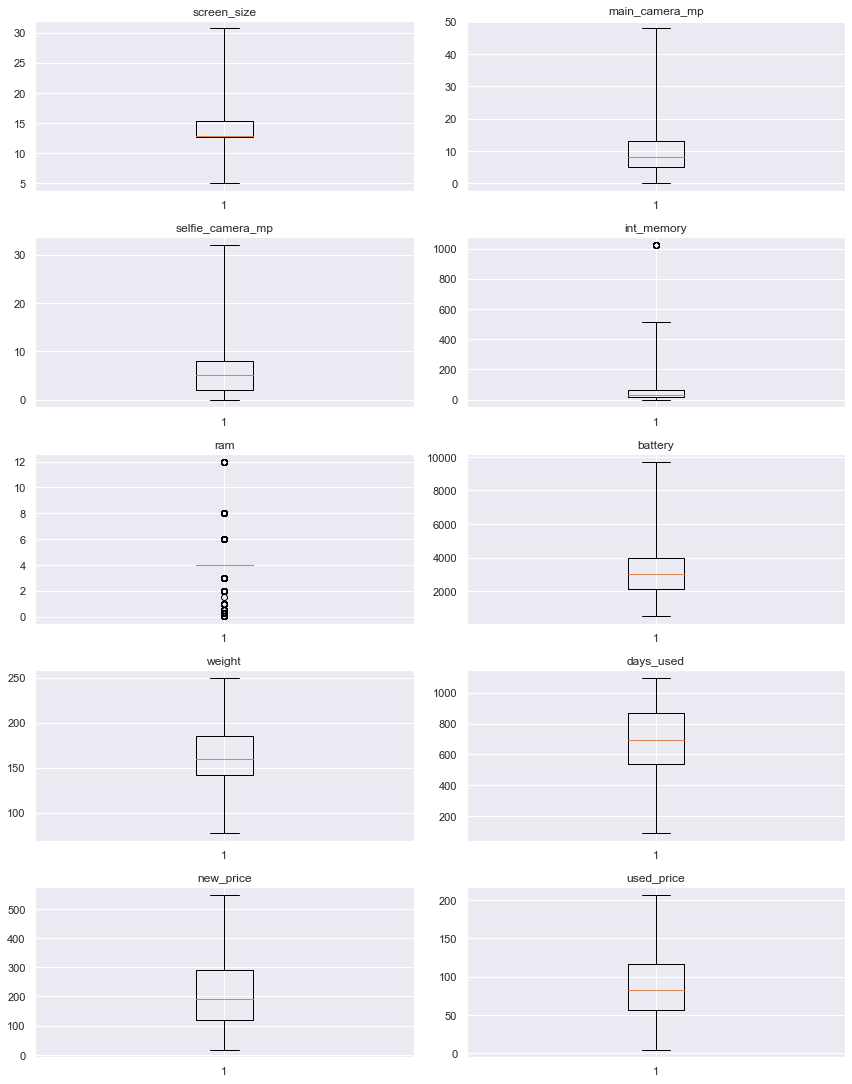

<IPython.core.display.Javascript object>

In [68]:
plt.figure(figsize=(12, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(10, 2, i + 1)
    plt.boxplot(df3[variable], whis=10)
    plt.tight_layout()
    plt.title(variable)

plt.show()

## Observation: 
* The outliers are replaced from the dataset and stored in df3.

# 4- Building a Linear Regression model

In [69]:
# define dependent variable
X = df3.drop(["used_price", "device_category"], axis=1)
y = df3["used_price"]

<IPython.core.display.Javascript object>

In [70]:
# let's add the intercept to data
X = sm.add_constant(X)

<IPython.core.display.Javascript object>

In [71]:
# creating dummy variables

X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

# to ensure all variables are of float type
X = X.astype(float)

X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,brand_name_Alcatel,brand_name_Apple,brand_name_Asus,brand_name_BlackBerry,brand_name_Celkon,brand_name_Coolpad,brand_name_Gionee,brand_name_Google,brand_name_HTC,brand_name_Honor,brand_name_Huawei,brand_name_Karbonn,brand_name_LG,brand_name_Lava,brand_name_Lenovo,brand_name_Meizu,brand_name_Micromax,brand_name_Microsoft,brand_name_Motorola,brand_name_Nokia,brand_name_OnePlus,brand_name_Oppo,brand_name_Others,brand_name_Panasonic,brand_name_Realme,brand_name_Samsung,brand_name_Sony,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,2020.0,127.0,111.62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,2020.0,325.0,249.39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,2020.0,162.0,359.47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,249.5,2020.0,345.0,278.93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,2020.0,293.0,140.87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


<IPython.core.display.Javascript object>

In [72]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2410
Number of rows in test data = 1034


<IPython.core.display.Javascript object>

In [73]:
# fitting a linear model
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     231.5
Date:                Thu, 03 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:26:47   Log-Likelihood:                -10601.
No. Observations:                2410   AIC:                         2.130e+04
Df Residuals:                    2362   BIC:                         2.158e+04
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1237.53

<IPython.core.display.Javascript object>

## Observation: 
* The first model is generated with the name of olsmodel.
* The model performance should be investigated.
* There are number of variables which has the p bigger than t which should be treated step-wise.

# 5- Model performance evaluation

In [74]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [75]:
# Checking model performance on train set
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,19.687696,14.839114,0.821644,0.818018,19.335988


<IPython.core.display.Javascript object>

In [76]:
# Checking model performance on test set
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,19.527686,14.773301,0.814152,0.805095,19.503556


<IPython.core.display.Javascript object>

## Observation: 

* The train and test $R^2$ are 0.821 and 0.814, indicating that the model explains 82% and 81% of the total variation in the train and test sets respectively. Also, both scores are comparable.
* RMSE values on the train and test sets are also comparable.
* This shows that the model is not overfitting.
* MAE indicates that our current model is able to predict used device price within a mean absolute error of 14.7 on the test set.
* MAPE of 19.52 on the test data means that we are able to predict within 19% of the used device price.

# 6- Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

## 6-1 Check for Multicollinearity

In [77]:
#let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns,
 )

print("VIF values: \n\n{}\n".format(vif_series1))


VIF values: 

const                    3.438577e+06
screen_size              5.318991e+00
main_camera_mp           2.165927e+00
selfie_camera_mp         2.852281e+00
int_memory               1.388414e+00
ram                      2.210203e+00
battery                  4.369592e+00
weight                   3.497022e+00
release_year             4.442737e+00
days_used                2.545801e+00
new_price                2.579493e+00
brand_name_Alcatel       3.245323e+00
brand_name_Apple         1.298440e+01
brand_name_Asus          3.285692e+00
brand_name_BlackBerry    1.550483e+00
brand_name_Celkon        1.654614e+00
brand_name_Coolpad       1.490484e+00
brand_name_Gionee        1.973673e+00
brand_name_Google        1.181764e+00
brand_name_HTC           3.083238e+00
brand_name_Honor         3.194478e+00
brand_name_Huawei        5.633584e+00
brand_name_Karbonn       1.635749e+00
brand_name_LG            4.772994e+00
brand_name_Lava          1.634597e+00
brand_name_Lenovo        4.332797e+0

<IPython.core.display.Javascript object>

## Observation: 

* As there is no value more than 10, only the items that have p-value more than 0.05 should be dropped from the model with 95% of confidense. 

In [78]:
# initial list of columns
cols = X.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux, x_test_aux, y_train, y_test = train_test_split(
        X[cols], y, test_size=0.3, random_state=1
    )

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'weight', 'release_year', 'new_price', 'brand_name_Xiaomi', 'os_Others', 'os_Windows']


<IPython.core.display.Javascript object>

## Observation: 

* The above selected features are the ones which has p-value less than 0.05 which mean more than 95% of confidense.

In [79]:
x_train2, x_test2, y_train, y_test = train_test_split(
    X[selected_features], y, test_size=0.3, random_state=1
)

print("Number of rows in train data =", x_train2.shape[0])
print("Number of rows in test data =", x_test2.shape[0])

Number of rows in train data = 2410
Number of rows in test data = 1034


<IPython.core.display.Javascript object>

In [80]:
# fitting a linear model
olsmodel2 = sm.OLS(y_train, x_train2).fit()
print(olsmodel2.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     997.2
Date:                Thu, 03 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:26:50   Log-Likelihood:                -10608.
No. Observations:                2410   AIC:                         2.124e+04
Df Residuals:                    2398   BIC:                         2.131e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1650.8729    523.17

<IPython.core.display.Javascript object>

## Observation: 

* The model run again and the new model is generated with all p-values less than 0.05.
* The predictors variables are in selected_feature list.

In [81]:
# Checking model performance on train set
print("Training Performance\n")
olsmodel2_train_perf = model_performance_regression(olsmodel2, x_train2, y_train)
olsmodel2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,19.745298,14.9058,0.820599,0.819701,19.419249


<IPython.core.display.Javascript object>

In [82]:
# Checking model performance on test set
print("Test Performance\n")
olsmodel2_test_perf = model_performance_regression(olsmodel2, x_test2, y_test)
olsmodel2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,19.525561,14.772314,0.814192,0.812008,19.438801


<IPython.core.display.Javascript object>

## Observation: 

* After dropping the features causing strong multicollinearity and the statistically insignificant ones, the model performance is mostly the same (adj. R-squared changed from 0.819 to 0.812). This shows that the dropped variables did not have much predictive power.

## 6-2 TEST FOR LINEARITY AND INDEPENDENCE

* Make a plot of fitted values vs residuals. If they don't follow any pattern (the curve is a straight line), then we say the model is linear otherwise model is showing signs of non-linearity.

In [83]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten()  # actual values
df_pred["Fitted Values"] = olsmodel2.fittedvalues.values  # predicted values
df_pred["Residuals"] = olsmodel2.resid.values  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
0,56.50,69.011646,-12.511646
1,88.86,113.901481,-25.041481
2,56.21,75.213018,-19.003018
3,54.83,48.671395,6.158605
4,95.42,99.982746,-4.562746


<IPython.core.display.Javascript object>

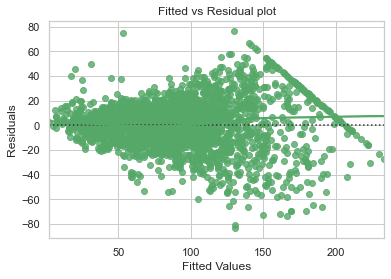

<IPython.core.display.Javascript object>

In [84]:
# let us plot the fitted values vs residuals
sns.set_style("whitegrid")
sns.residplot(data=df_pred, x="Fitted Values", y="Residuals", color="g", lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

## Observation: 

* We observe that the pattern has slightly decreased and the data points seems to be randomly distributed.

## 6-2 TEST FOR NORMALITY

* The normally can be checked via QQ Plot - residuals following normal distribution will make a straight line plot, otherwise not.

* Another test to check for normality is the Shapiro-Wilk test.

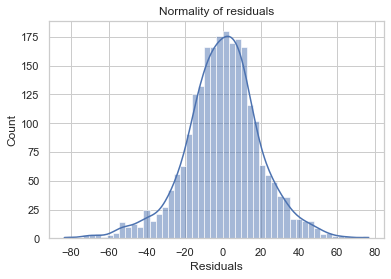

<IPython.core.display.Javascript object>

In [85]:
sns.histplot(df_pred["Residuals"], kde=True, bins=50)
plt.title("Normality of residuals")
plt.show()

## Observation: 

* The residual terms seems normally distributed.

### The QQ plot of residuals can be used to visually check the normality assumption. The normal probability plot of residuals should approximately follow a straight line.

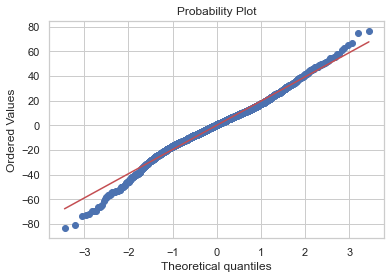

<IPython.core.display.Javascript object>

In [86]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

## Observation: 

* Most of the points are lying on the straight line in QQ plot 

### The Shapiro-Wilk test can also be used for checking the normality. The null and alternate hypotheses of the test are as follows:

* Null hypothesis - Data is normally distributed.
* Alternate hypothesis - Data is not normally distributed.

In [87]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9869546294212341, pvalue=4.729363737654771e-14)

<IPython.core.display.Javascript object>

* Since p-value < 0.05, the residuals are not normal as per shapiro test.
* Strictly speaking - the residuals are not normal. However, as an approximation, we might be willing to accept this distribution as close to being normal

## 6-2 TEST FOR HOMOSCEDASTICITY

* For Heteroscedasticity check, we can use the goldfeldquandt test. If we get p-value > 0.05 we can say that the residuals are homoscedastic, otherwise they are heteroscedastic

The null and alternate hypotheses of the goldfeldquandt test are as follows:

* Null hypothesis : Residuals are homoscedastic
* Alternate hypothesis : Residuals have hetroscedasticity

In [88]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train2)
lzip(name, test)

[('F statistic', 1.0738915024312876), ('p-value', 0.10920514494647338)]

<IPython.core.display.Javascript object>

* Since p-value > 0.05 we can say that the residuals are homoscedastic.

### All the assumptions of linear regression are now satisfied. Let's check the summary of our final model

## Final Model Summary

In [89]:
print(olsmodel2.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     997.2
Date:                Thu, 03 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:27:01   Log-Likelihood:                -10608.
No. Observations:                2410   AIC:                         2.124e+04
Df Residuals:                    2398   BIC:                         2.131e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1650.8729    523.17

<IPython.core.display.Javascript object>

In [90]:
# Checking final model performance on test set
print("Test Performance\n")
olsmodel2_test_perf = model_performance_regression(olsmodel2, x_test2, y_test)
olsmodel2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,19.525561,14.772314,0.814192,0.812008,19.438801


<IPython.core.display.Javascript object>

### Observations

* R-squared of the model is 0.821 and adjusted R-squared is 0.820, which shows that the model is able to explain ~82% variance in the data. This is quite good.

* A unit increase in the realse_year will result in a 0.802unit increase in the used device price, all other variables remaining constant.

* A unit increase in the ram will result in a 2.18unit increase in the used device price, all other variables remaining constant.

* If all the variables are the same, the Xiaomi brand will have 4.38 unit price more in the used devices

* And so on for the other variables.


## Predictions

In [91]:
# let's check the model parameters
olsmodel2.params

const               -1650.872938
screen_size             2.608867
main_camera_mp          1.436293
selfie_camera_mp        1.544084
int_memory              0.035234
ram                     2.182704
weight                  0.104032
release_year            0.802416
new_price               0.157199
brand_name_Xiaomi       4.386697
os_Others              13.405341
os_Windows              6.010148
dtype: float64

<IPython.core.display.Javascript object>

## Observation: 

* The predictors coefficients are listed above in the final model.

In [92]:
# Let us write the equation of linear regression
Equation = "used_price ="
print(Equation, end=" ")
for i in range(len(x_train2.columns)):
    if i == 0:
        print(olsmodel2.params[i], "+", end=" ")
    elif i != len(x_train2.columns) - 1:
        print(
            olsmodel2.params[i], "* (", x_train2.columns[i], ")", "+", end="  ",
        )
    else:
        print(olsmodel2.params[i], "* (", x_train2.columns[i], ")")

used_price = -1650.8729376473882 + 2.608866940282911 * ( screen_size ) +  1.4362934775017204 * ( main_camera_mp ) +  1.5440844300735694 * ( selfie_camera_mp ) +  0.035233672461544255 * ( int_memory ) +  2.182704140774022 * ( ram ) +  0.10403199771423983 * ( weight ) +  0.8024158276602084 * ( release_year ) +  0.1571991940950904 * ( new_price ) +  4.386696890443026 * ( brand_name_Xiaomi ) +  13.405341087056977 * ( os_Others ) +  6.010147786351614 * ( os_Windows )


<IPython.core.display.Javascript object>

## Observation: 

* The performance of the second model are described above, which is the same as the performance of the final model. 

## Actionable Insights and Recommendations

- 

** If all the parameters be fix and just one varable change, here are some conclusion:
* On the operating systems, the windows has the most effect on the used devices prices. It means, if the customer by the devices with windows OS, the depreciation will be lower. 
* The screen size and the amount of ram is the next items which should be considered.
* The selfie camera is a little bit more important than the main camera mp.
* The Xiaomi brand have the highest price regarding the other brands in the used devices.
* The price of the new devices, has a low effect on the used devices. It means, if customer buy a high value new device, it does not mean that the used one will have the highest price. The other variables are controlling more the used devices prices.
* Inernal memory has the lowest effect on the used device prices. 

** About the model:
* We can see that RMSE on the train and test sets are comparable. So, our model is not suffering from overfitting.
* MAE indicates that our current model is able to predict used device price within a mean error of 14.7 units on the test data.
* Hence, we can conclude the model "olsmodel2" is good for prediction as well as inference purposes.


** Recommendation: 
* Brand Xiaomi has the less amount of price drop respect to the other brands. So it is recommended to buy Xiaomi brand in such a case that the other parameters are fix.
* If the device has the windows OS, the used device price will be higher respect to the other OS.
* Although the screen size has direct effect on the weight (weight as a negative point of devices), but it is recommneded to buy the big screen size devices which has the less drop in price of used devices. 
